In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import matplotlib.colors as colors
import numpy as np
from scipy.optimize import nnls
from sklearn.linear_model import LinearRegression

In [48]:
def plot(df,name):
    # Your data
    column_name_probability = ['ProbabilityScalarArithmetic',
        'ProbabilityScalarLogic',
        'ProbabilityScalarMemory',
        'ProbabilityScalarBranch',
        'ProbabilityScalarJump',
        'ProbabilityVectorArithmetic',
        'ProbabilityVectorLogic',
        'ProbabilityVectorMemory',
        'ProbabilityVectorBranch',
        'ProbabilityVectorJump']
    
    column_name_probability_labels = ['ScalarArithmetic',
        'ScalarLogic',
        'ScalarMemory',
        'ScalarBranch',
        'ScalarJump',
        'VecArithmetic',
        'VecLogic',
        'VecMemory',
        'VecBranch',
        'VecJump']
    plt.figure(figsize=(14,14))

    plt.subplot(2, 2, 1)

    plt.title(name)
    x=range(0,len(column_name_probability))
    
    plt.bar(x=x,height=df[column_name_probability].mean(),alpha=0.3)
    plt.errorbar(x,df[column_name_probability].mean(),yerr=df[column_name_probability].std(), fmt='o')
    #.plot(kind='bar', width=0.8) # Plot bar chart
    #plt.title("ksad") # Set title as column name
    #plt.xlabel(column) # Set x-axis label as column name
    plt.xticks(ticks=x,labels=column_name_probability_labels,rotation=90-15,fontsize=8)
    #plt.xticks(ticks=range(0,len(column_name)),labels=column,rotation=45)
    plt.ylabel('Value') # Set y-axis label as 'Value'
    column_name=["SocketPower0", "SocketPower1","PSUPower0","PSUPower1"]
    plt.subplot(2, 2, 2)
    plt.title("System power")
    _ = plt.plot(df[column_name],label=column_name)
    plt.ylim([0,700])
    plt.legend()
    plt.subplot(2, 2, 3)
    filtered_df = df[column_name_probability].loc[:, df[column_name_probability].mean() > 0]
    plt.plot(filtered_df,label=filtered_df.columns.tolist())
    plt.legend()
    plt.subplot(2, 2, 4)
    plt.title("System usage")
    plt.plot(df[["SystemCpuUsage" ,"ProcessCpuUsage"]],label=["SystemCpuUsage" ,"ProcessCpuUsage"])
    plt.legend()
    plt.savefig(f"{name}.png")

Opened file: power_copy.csv
Opened file: power_copy_mem.csv
Opened file: power_copy_mem_avx.csv
Opened file: power_daxpy_mem_avx_fma.csv
Opened file: power_stream_mem_avx_fma.csv
Opened file: power_update_avx.csv
Opened file: power_load_mem.csv
Opened file: power_load_avx.csv
Opened file: power_store_mem.csv
Opened file: power_store_mem_avx.csv
Opened file: power_peakflops_avx_fma.csv


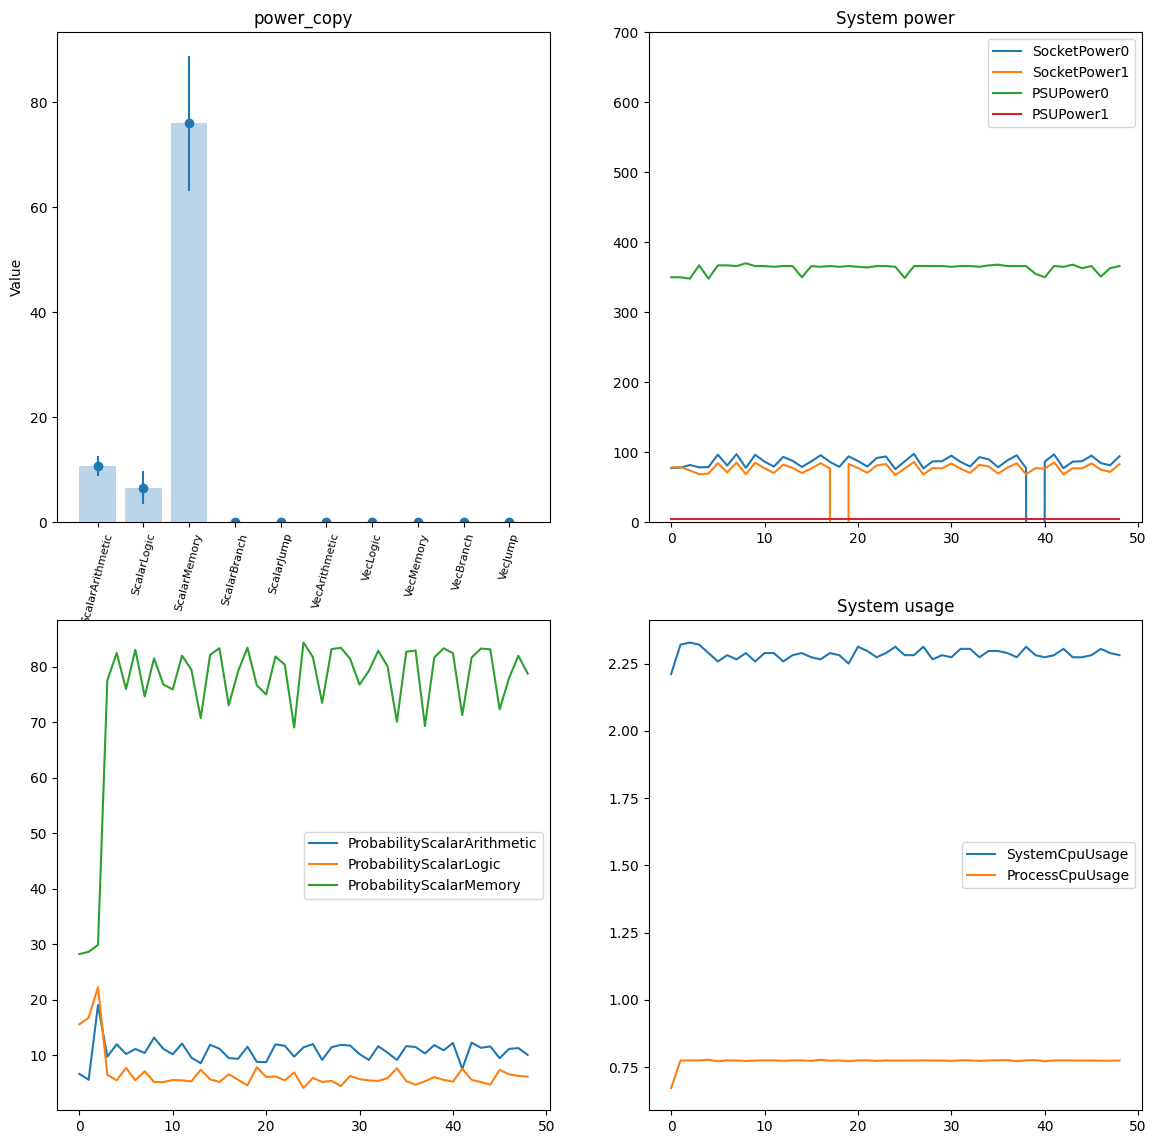

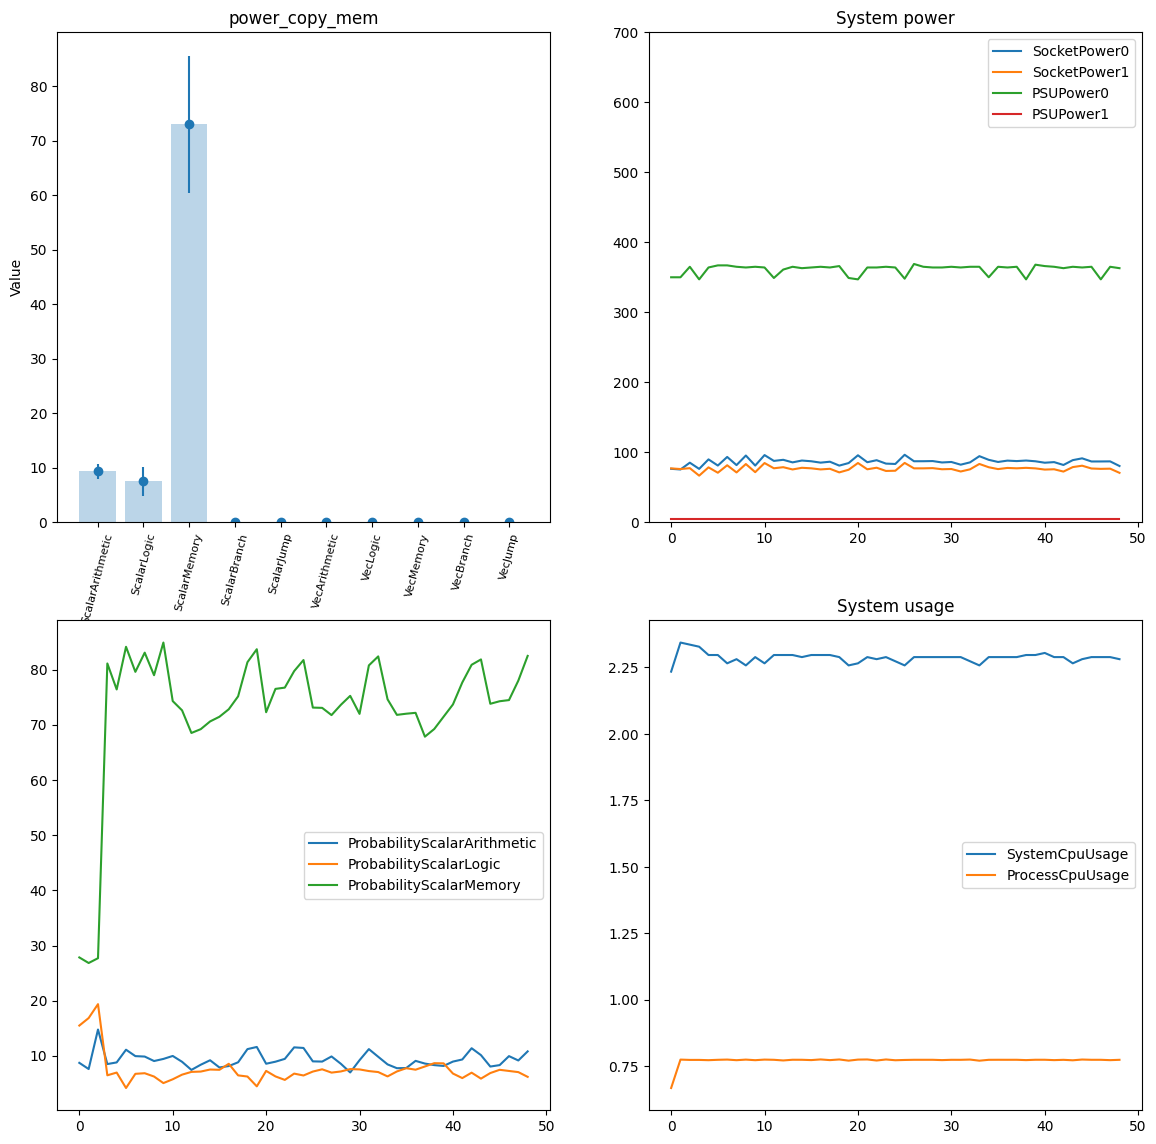

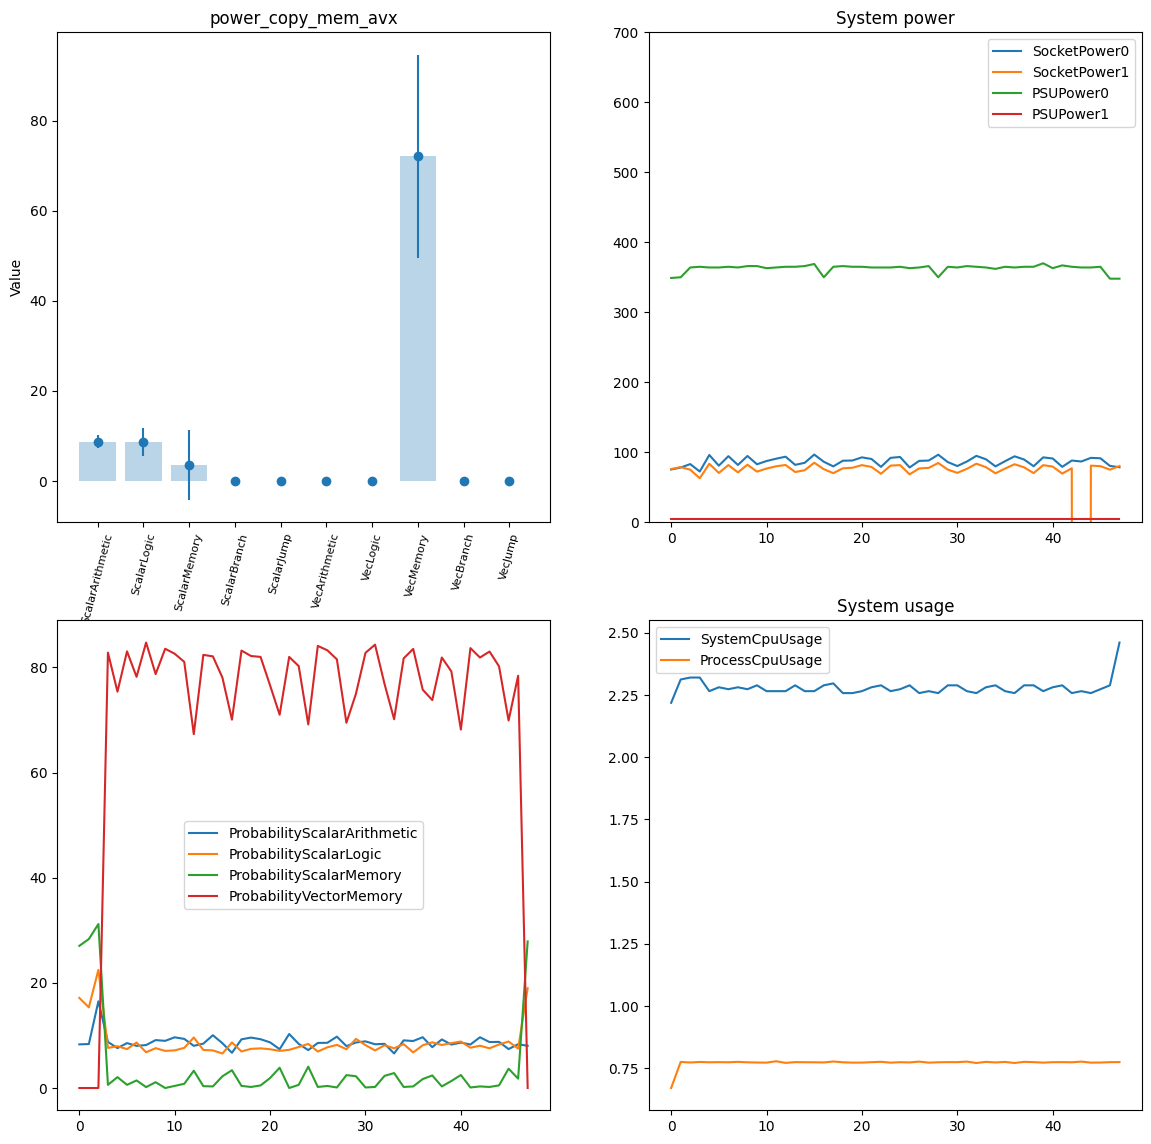

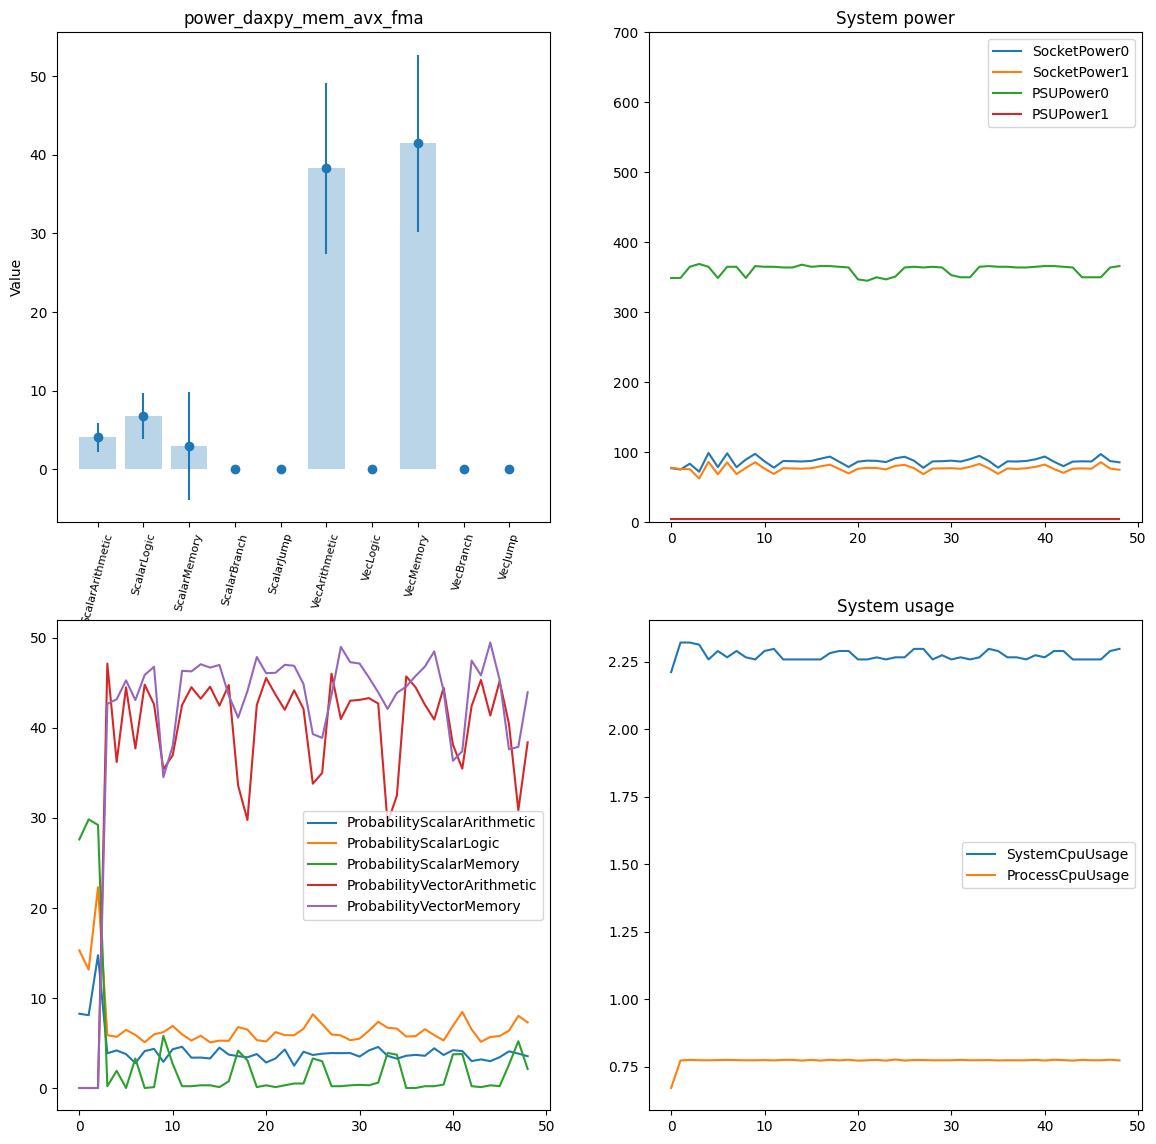

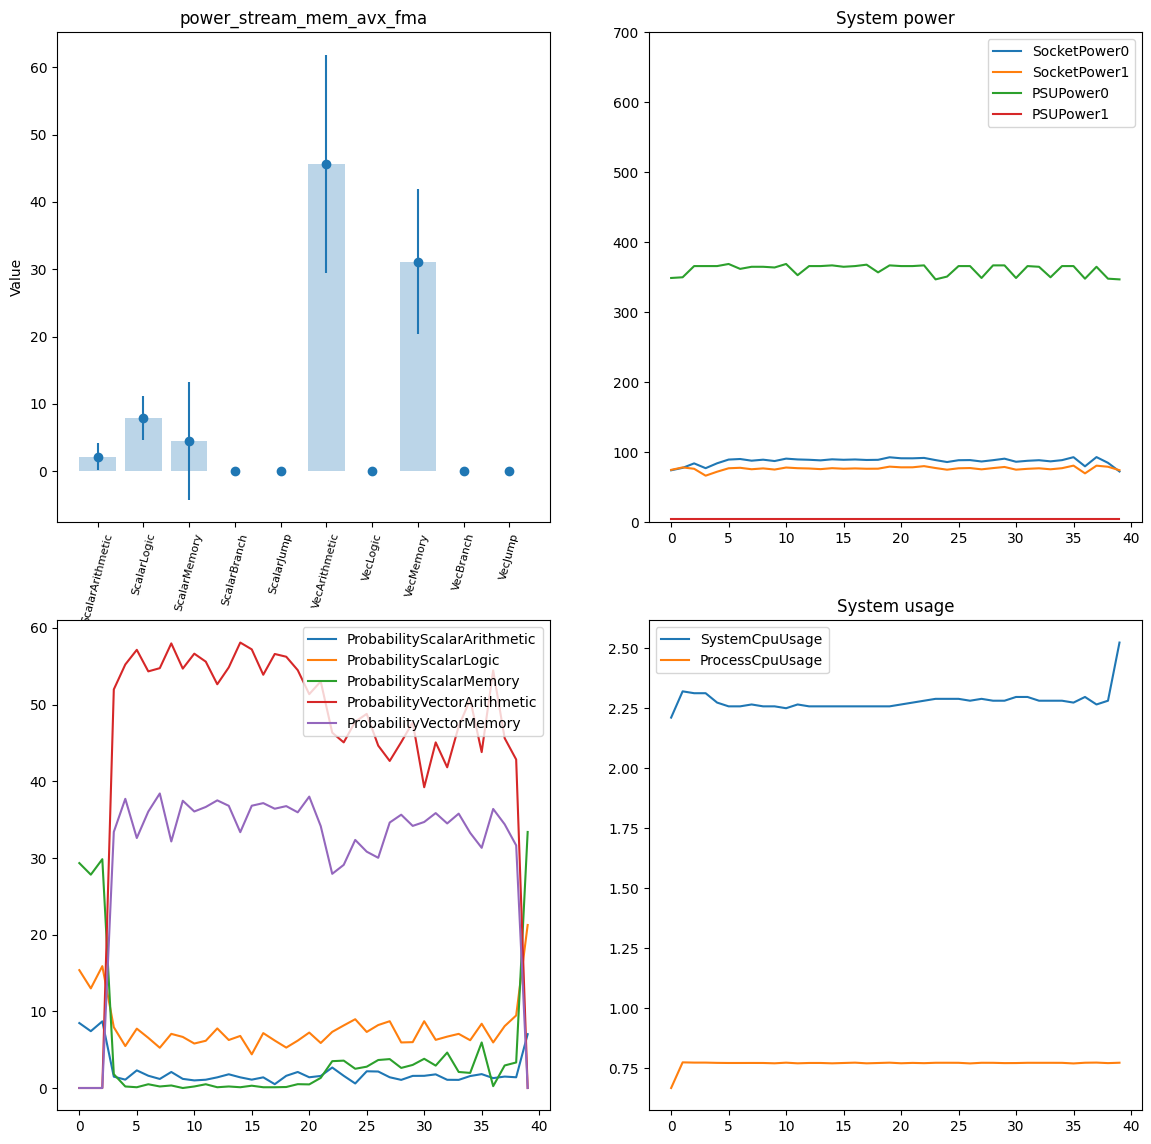

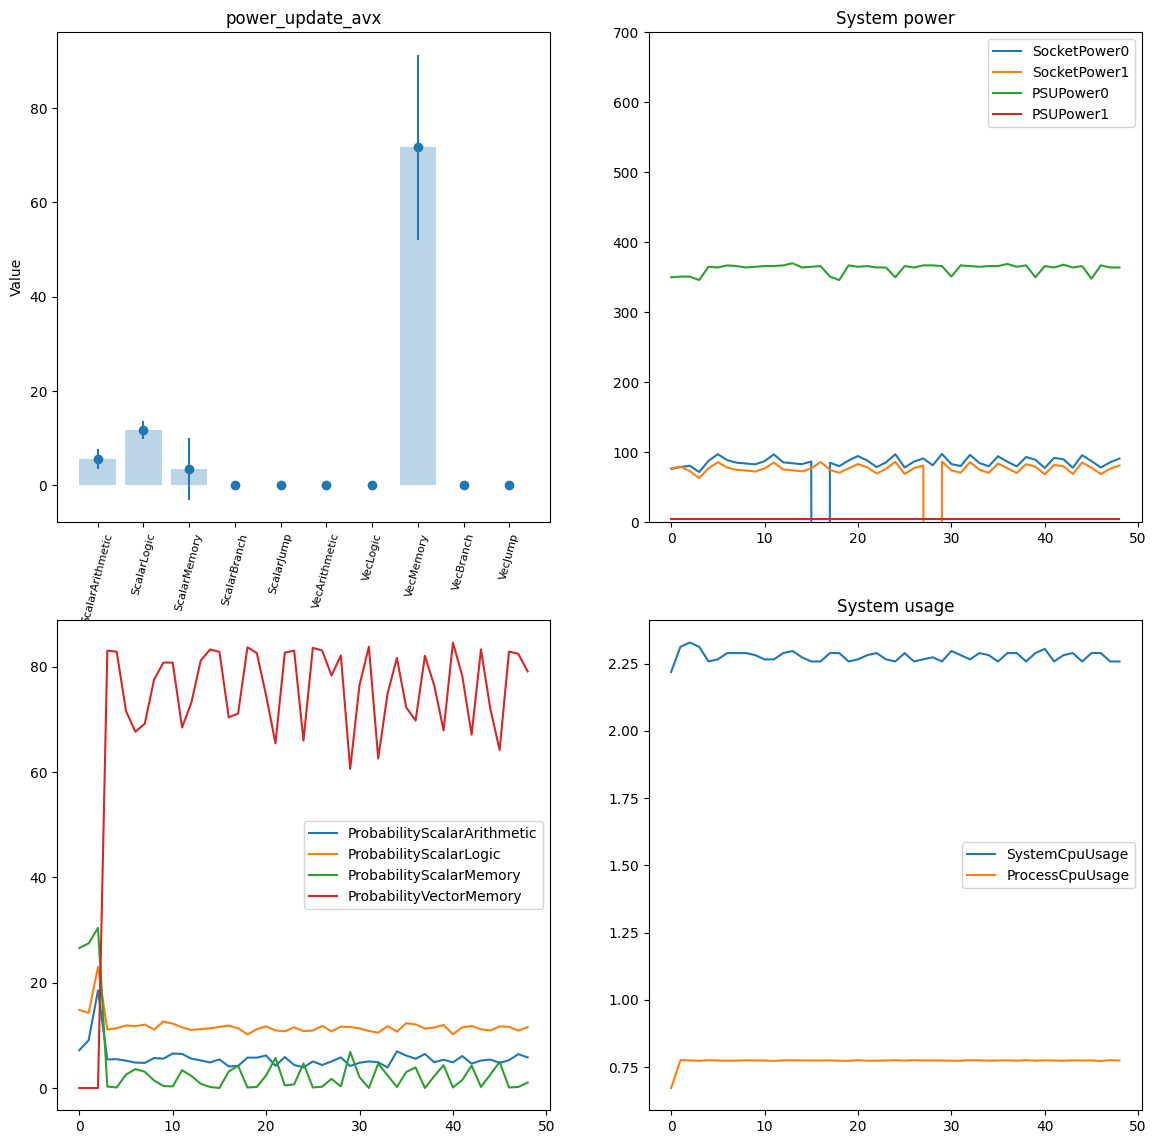

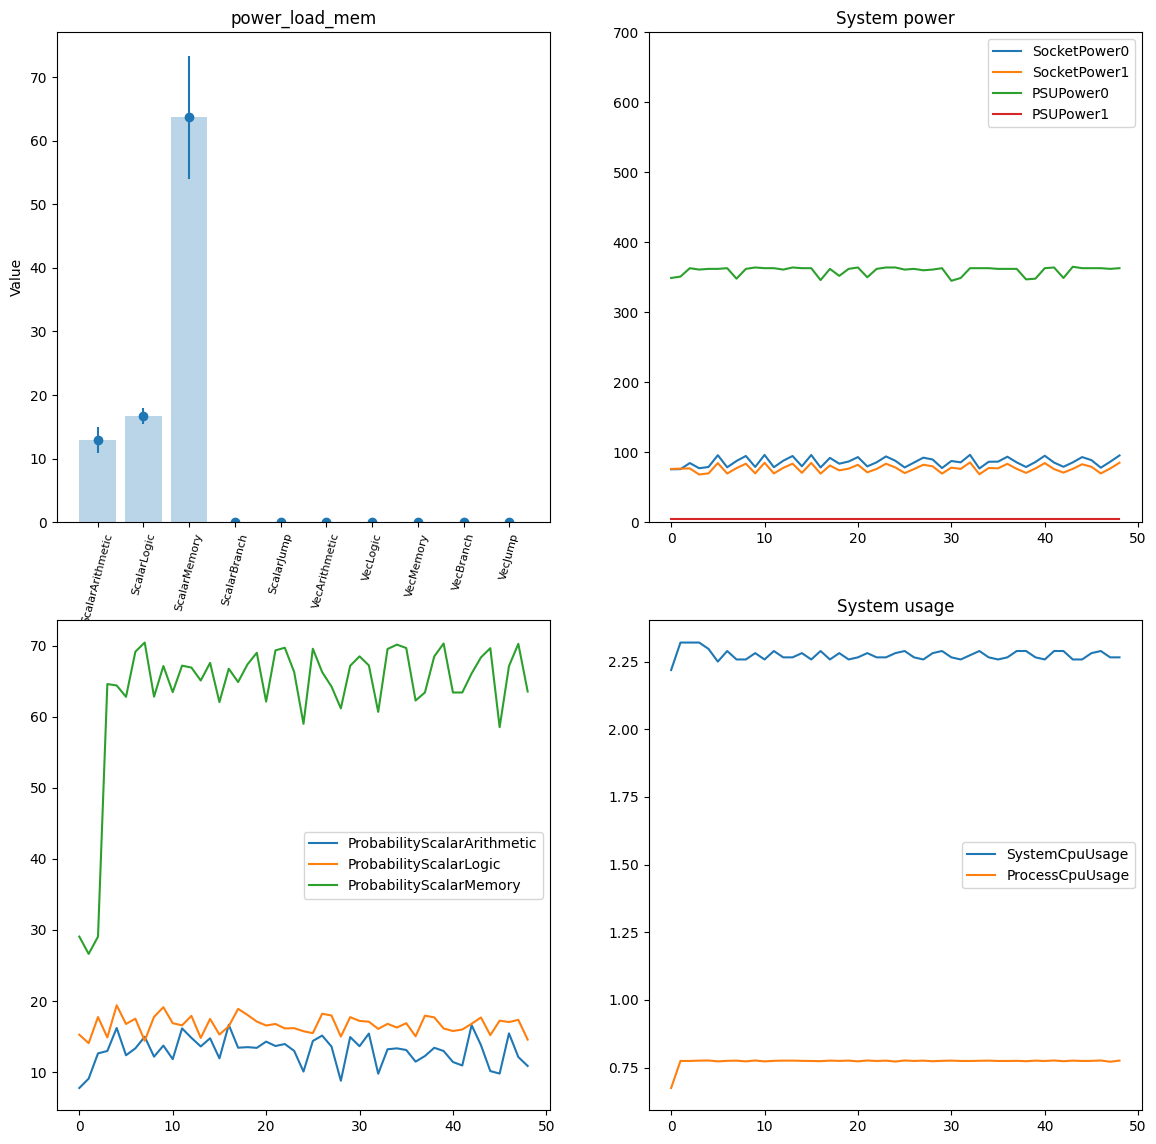

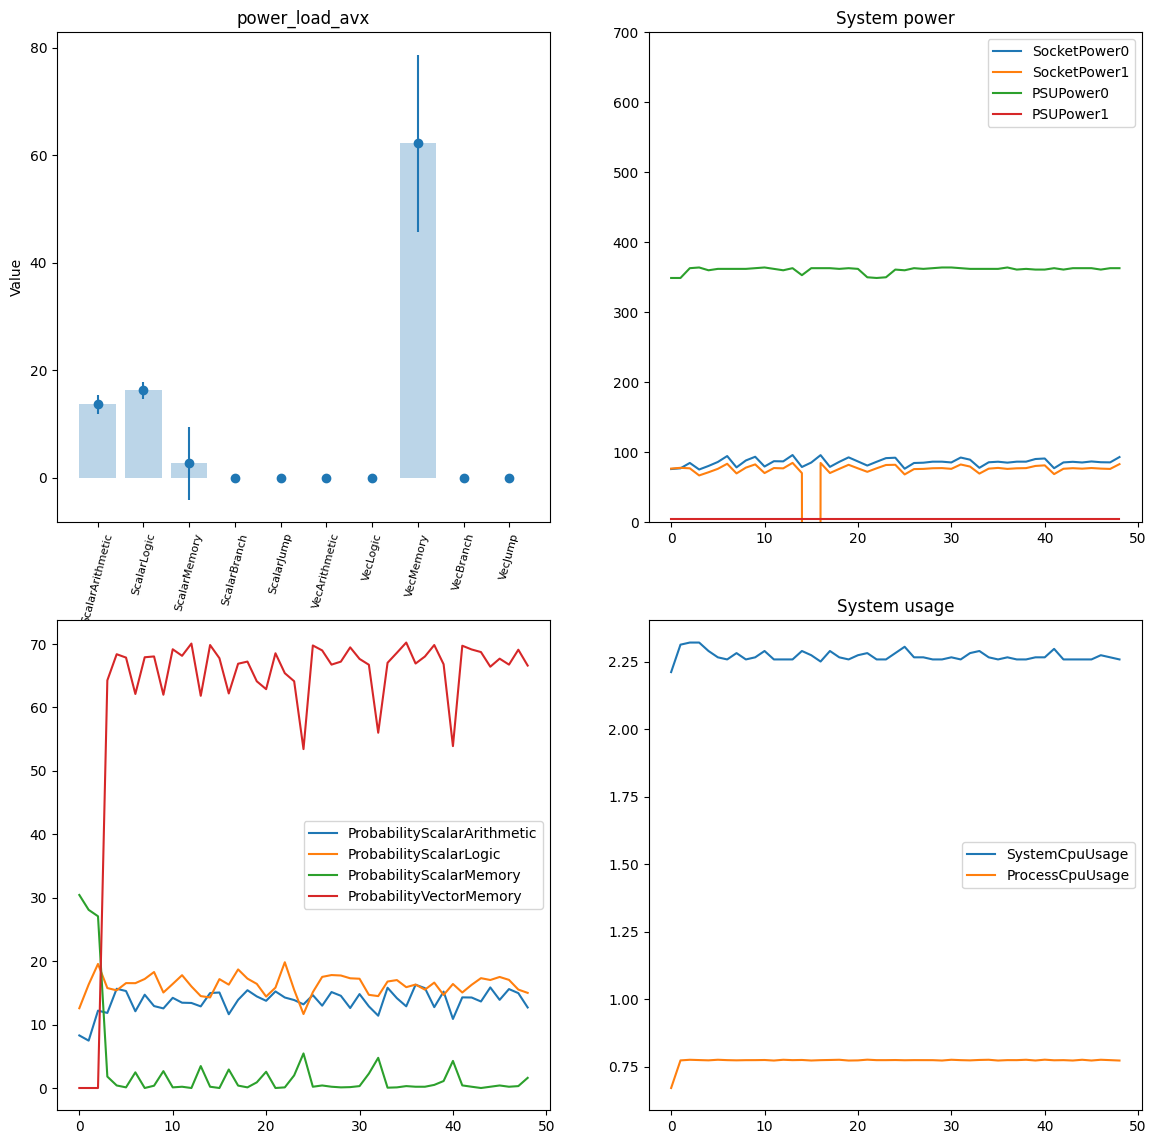

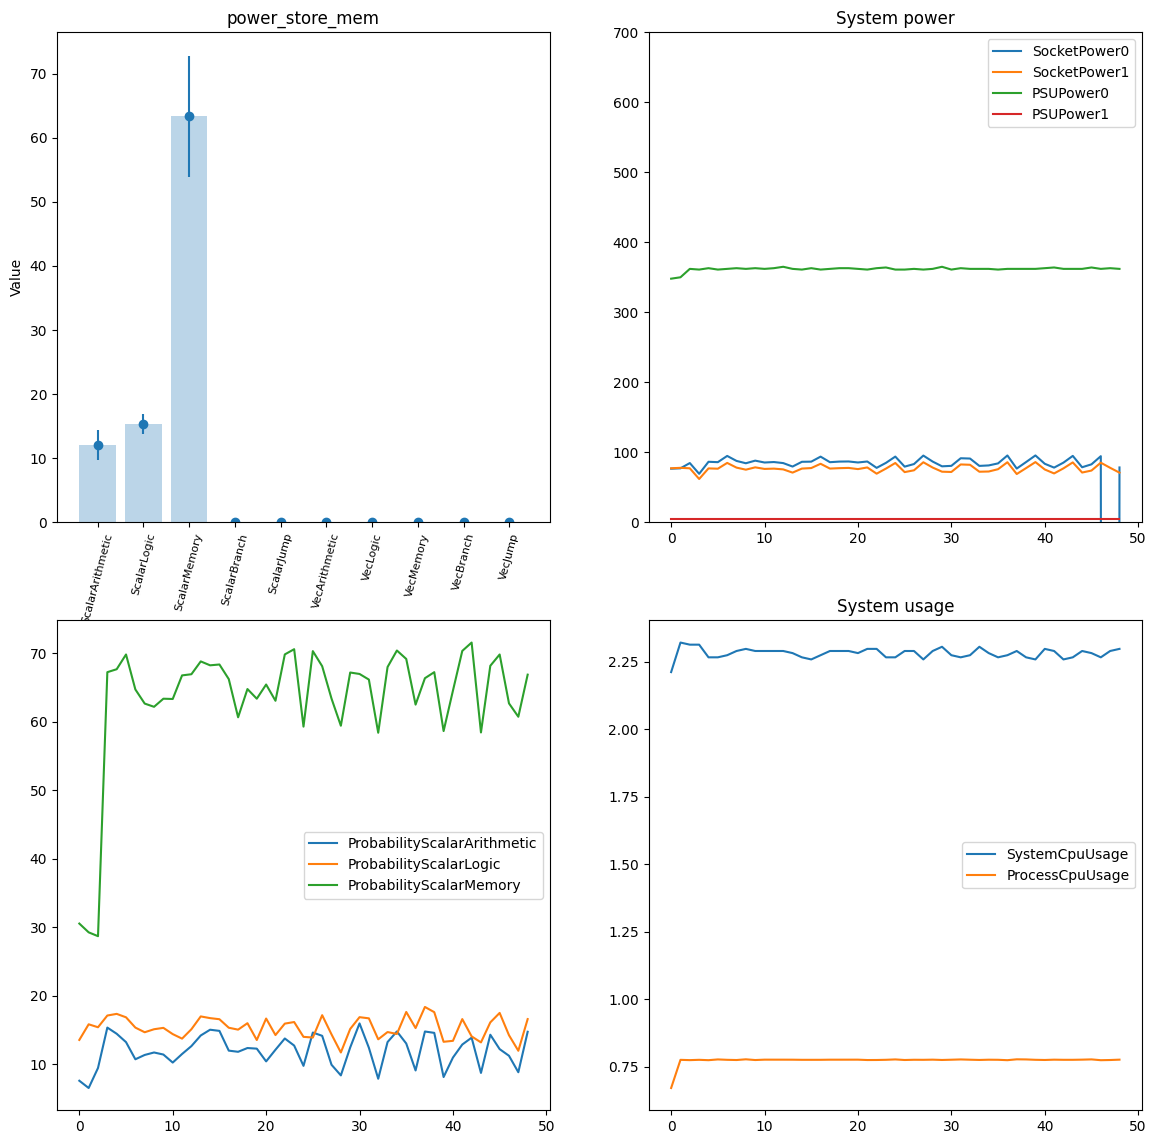

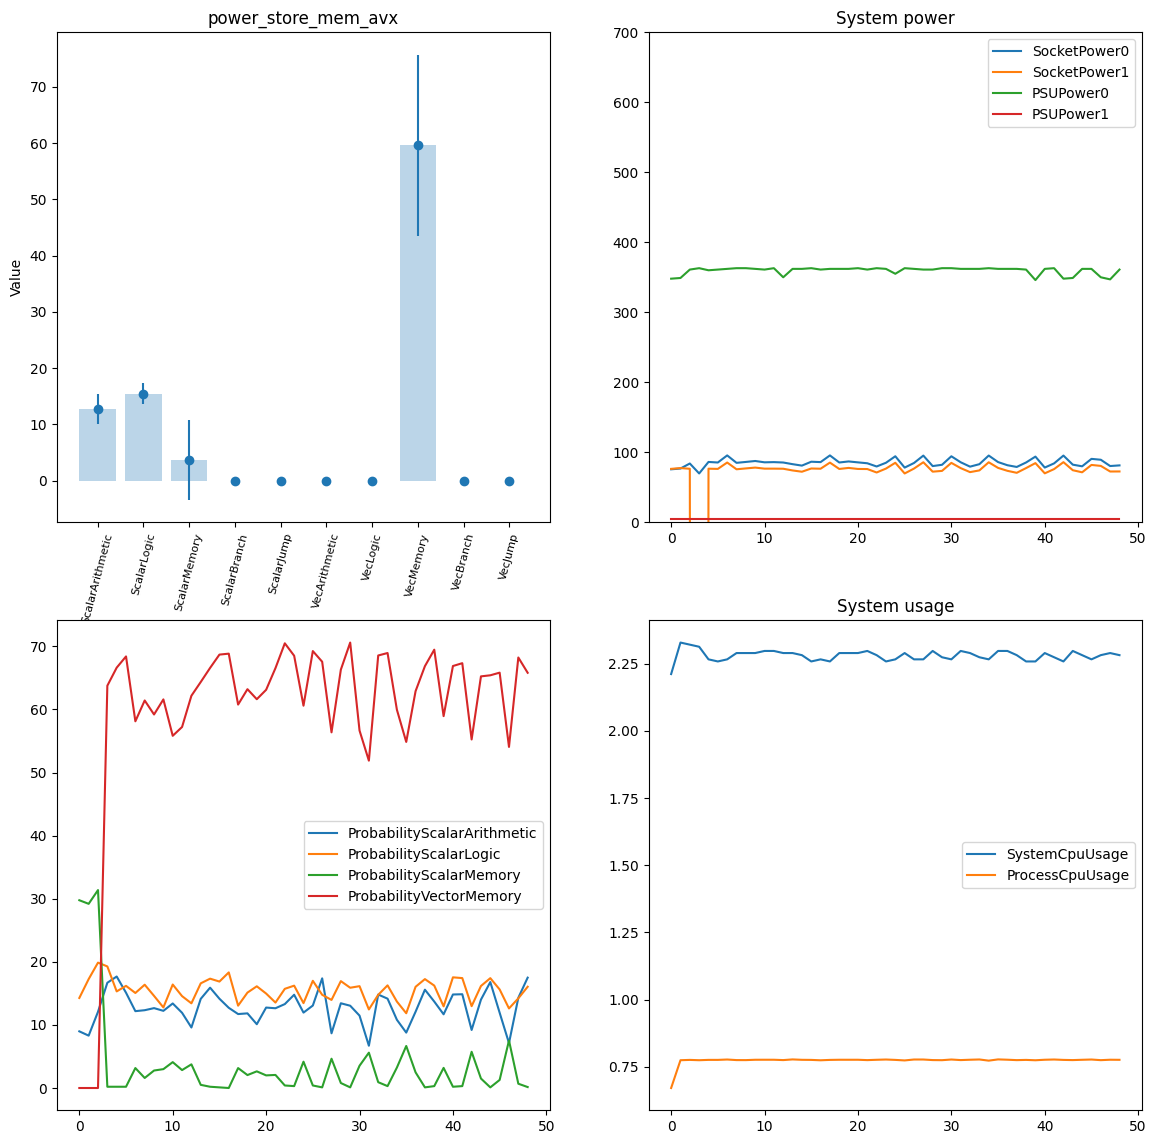

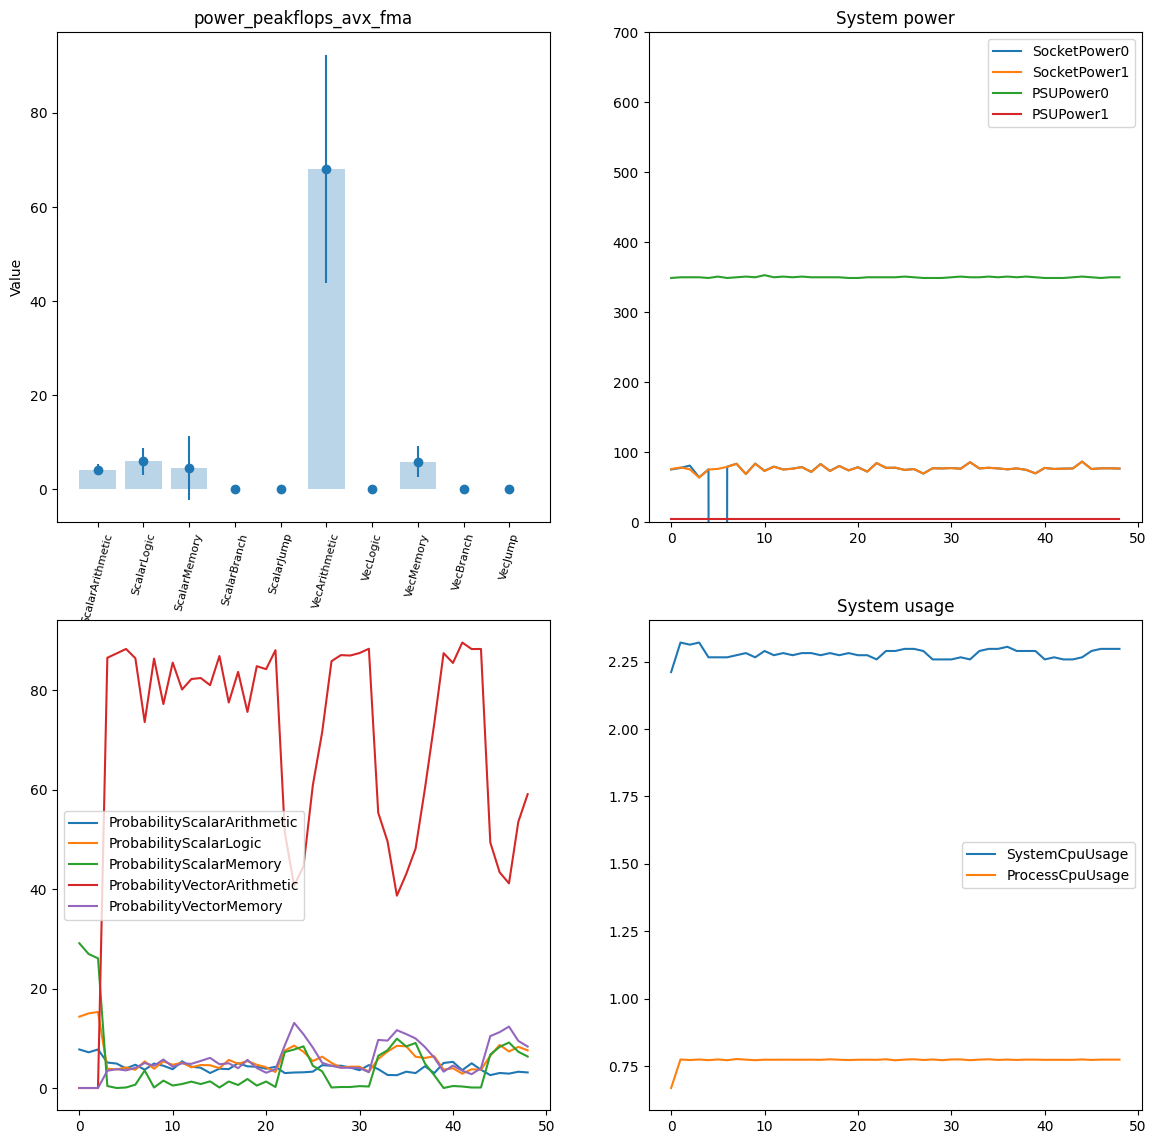

In [49]:
directory_list=["results_1500/results_fan"]

df_list=list()
for directory in directory_list:
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            try:
                df = pd.read_csv(os.path.join(directory, filename))
                df_list.append(df)
                print(f"Opened file: {filename}")
                #print(df.head())  # prints the first 5 rows of each CSV file
                plot(df,os.path.basename(filename).split(".")[0])
            except Exception as e:
                print(e)

Opened file: power_copy.csv
Opened file: power_copy_mem.csv
Opened file: power_copy_mem_avx.csv
Opened file: power_daxpy_mem_avx_fma.csv
Opened file: power_stream_mem_avx_fma.csv
Opened file: power_update_avx.csv
Opened file: power_load_mem.csv
Opened file: power_load_avx.csv
Opened file: power_store_mem.csv
Opened file: power_store_mem_avx.csv
Opened file: power_peakflops_avx_fma.csv


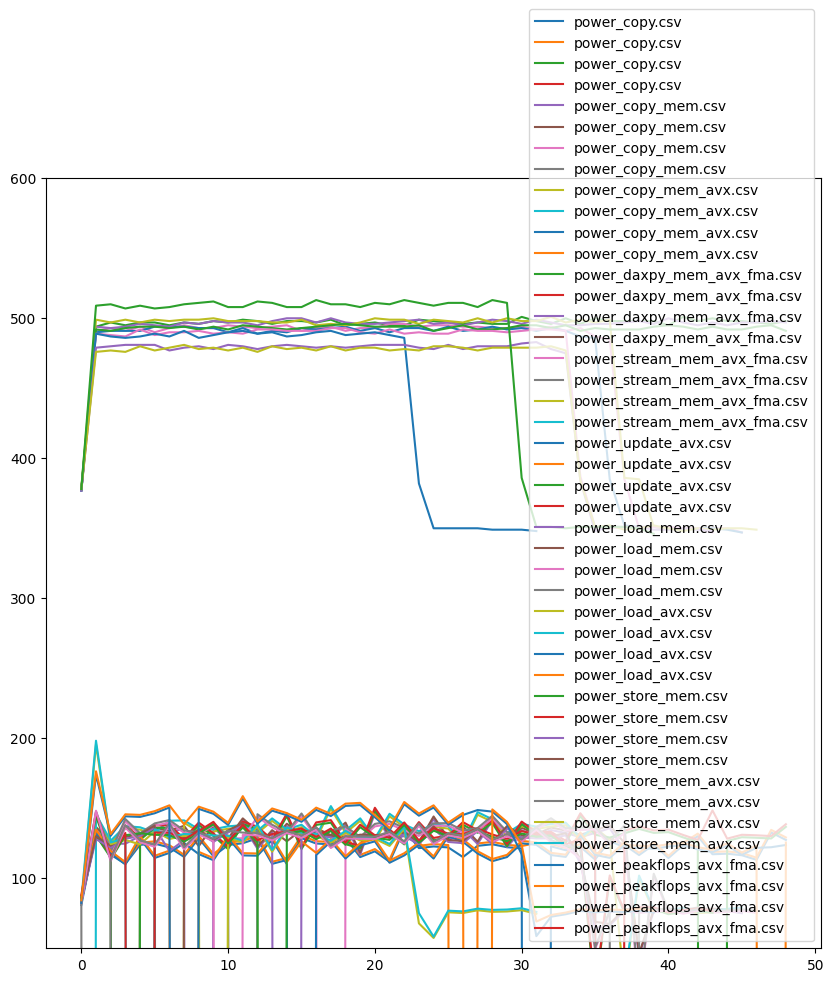

In [50]:
directory_list=["results_1500/results_96"]
plt.figure(figsize=(10,10))
df_list=list()
for directory in directory_list:
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            try:
                df = pd.read_csv(os.path.join(directory, filename))
                df_list.append(df)
                print(f"Opened file: {filename}")
                column_name=["SocketPower0", "SocketPower1","PSUPower0","PSUPower1"]
                plt.ylim([50,600])
                plt.plot(df[column_name],label=filename)
                #print(df.head())  # prints the first 5 rows of each CSV file
                #plot(df,os.path.basename(filename).split(".")[0])
            except Exception as e:
                print(e)
plt.legend()

# Smarter model, paper model

In [216]:
def normalize_model1(df):
    percentages=independent_variables=["ProbabilityScalarArithmetic",
                       "ProbabilityScalarLogic", 	"ProbabilityScalarMemory",
                       "ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                       "ProbabilityVectorMemory", 	"ProbabilityVectorBranch",
                       "ProbabilityVectorJump"]
    
    df[percentages]=df[percentages]
    df["SystemCpuUsage"]=df["SystemCpuUsage"]/128
    df["ProcessCpuUsage"]=df["ProcessCpuUsage"]/128
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    df["Total_socket"]=df["SocketPower0"]+df["SocketPower1"]
    TDP=280

    for var in independent_variables:
  #      df[var]=df[var]*df["SystemCpuUsage"]*TDP*2
        df[var]=df[var]*df["ProcessCpuUsage"]*TDP*2#*df["Total_socket"]
    df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]
        
    return df

def normalize_model2(df):
    percentages=independent_variables=["ProbabilityScalarArithmetic",
                       "ProbabilityScalarLogic", 	"ProbabilityScalarMemory",
                       "ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                       "ProbabilityVectorMemory", 	"ProbabilityVectorBranch",
                       "ProbabilityVectorJump"]
    df[percentages]=df[percentages]
    df["SystemCpuUsage"]=df["SystemCpuUsage"]/128
    df["ProcessCpuUsage"]=df["ProcessCpuUsage"]/128
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    df["Total_socket"]=df["SocketPower0"]+df["SocketPower1"]
    TDP=280

    for var in independent_variables:
  #      df[var]=df[var]*df["SystemCpuUsage"]*TDP*2
        df[var]=df[var]*np.exp(df["ProcessCpuUsage"])*TDP*2#*df["Total_socket"]
    #df["Total_power"]=np.log(df["Total_power"])
    df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]
    df["Total_socket"]=np.log(df["SocketPower0"]+df["SocketPower1"])

    
    return df
    
def normalize_model3(df):
    percentages=independent_variables=["ProbabilityScalarArithmetic",
                       "ProbabilityScalarLogic", 	"ProbabilityScalarMemory",
                       "ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                       "ProbabilityVectorMemory", 	"ProbabilityVectorBranch",
                       "ProbabilityVectorJump"]
    df[percentages]=df[percentages]
    df["SystemCpuUsage"]=df["SystemCpuUsage"]
    df["ProcessCpuUsage"]=df["ProcessCpuUsage"]
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    df["Total_socket"]=df["SocketPower0"]+df["SocketPower1"]
    TDP=280

    for var in independent_variables:
  #      df[var]=df[var]*df["SystemCpuUsage"]*TDP*2
        df[var]=np.log(df[var]*df["ProcessCpuUsage"]+1)*TDP*2#*df["Total_socket"]
    df["Total_power"]=np.log(df["Total_power"])
    df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]
    df["Total_socket"]=np.log(df["SocketPower0"]+df["SocketPower1"])

    
    return df

In [217]:
def load_df_list_train():
    directory_list=["results_1500/results_32","results_1500/results_64",
                    "results_1500/results_96","results_1500/results_16","results_1500/results_48","results_1500/results_80",
                    "results_1500/results_112",
                    "results_1500/results_128","results_1500/results_sleep","results_1500/results_fan"]

    #directory_list=["results_1500/results_32"]
    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))
                    
                    if ("dgemm" not in directory)and (filename.find("_") > 0) and (filename.find(".") > 0):
                        bench_name=filename[filename.find("_")+1:filename.find(".")]
                    else:
                        bench_name="dgemm"

                    if "sleep" in directory:
                        cores=0
                    elif "fan" in directory:
                        cores=1
                    elif "dgemm" in directory:
                        cores=-1
                    else:
                        cores=int(directory.split("_")[2])
                    #df["name"]=directory+filename[]
                    df["name"]=bench_name
                    df["cores"]=cores
                    df_list.append(df.iloc[10:20])
                    #print(type(df_list[-1]))
                    #print(f"Opened file: {filename}")
                    #print(df.head())  # prints the first 5 rows of each CSV file
                    #plot(df,os.path.basename(filename).split(".")[0])
                except Exception as e:
                    print(e)
    return df_list
    
def load_df_list_test():
    directory_list=["results_1500/results_32","results_1500/results_64",
                    "results_1500/results_96","results_1500/results_16","results_1500/results_48","results_1500/results_80",
                    "results_1500/results_112",
                    "results_1500/results_128","results_1500/results_sleep","results_1500/results_fan"]
    #directory_list=["results_1500/results_fan"]

    df_list=list()
    for directory in directory_list:
        for filename in os.listdir(directory):
            if filename.endswith(".csv"):
                try:
                    df = pd.read_csv(os.path.join(directory, filename))
                    
                    if ("dgemm" not in directory)and (filename.find("_") > 0) and (filename.find(".") > 0):
                        bench_name=filename[filename.find("_")+1:filename.find(".")]
                    else:
                        bench_name="dgemm"

                    if "sleep" in directory:
                        cores=0
                    elif "fan" in directory:
                        cores=1
                    elif "dgemm" in directory:
                        cores=-1
                    else:
                        cores=int(directory.split("_")[2])
                    #df["name"]=directory+filename[]
                    df["name"]=bench_name
                    df["cores"]=cores
                    df_list.append(df.iloc[10:20])
                    #print(type(df_list[-1]))
                    #print(f"Opened file: {filename}")
                    #print(df.head())  # prints the first 5 rows of each CSV file
                    #plot(df,os.path.basename(filename).split(".")[0])
                except Exception as e:
                    print(e)
    return df_list


In [218]:
df_list_train= load_df_list_train()
df = pd.concat([ i  for i in df_list_train if i is not None])

In [219]:
independent_variables=[ "ProbabilityScalarArithmetic",
                       "ProbabilityScalarLogic", 	"ProbabilityScalarMemory",
                       "ProbabilityScalarBranch", 	"ProbabilityScalarJump",
                       "ProbabilityVectorArithmetic", 	"ProbabilityVectorLogic",
                       "ProbabilityVectorMemory", 	"ProbabilityVectorBranch",
                       "ProbabilityVectorJump"]#,"SocketPower0","SocketPower1"]

In [220]:
df_list_train= load_df_list_train()
df = pd.concat(df_list_train)
df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]
df = normalize_model1(df.copy())
A=df[independent_variables].to_numpy()

b=np.ones((A.shape[0],1))

A=np.hstack((A,b))

coeff_1,error_1=nnls(A, df["Total_power"].to_numpy(), maxiter=1000,atol=max(A.shape) * np.linalg.norm(A, 1) * np.spacing(1.))
intercept_1=coeff_1[-1]
print(f"Residual {error_1}, intercept {intercept_1}")
#print(coeff)

for name,value in zip(independent_variables,coeff_1):
    print(name,value)

Residual 912.1046419980987, intercept 395.6931251734712
ProbabilityScalarArithmetic 0.004232874263125502
ProbabilityScalarLogic 0.0006663672131640036
ProbabilityScalarMemory 0.0032851802271704027
ProbabilityScalarBranch 0.0
ProbabilityScalarJump 0.0
ProbabilityVectorArithmetic 0.0038251161309268687
ProbabilityVectorLogic 0.0
ProbabilityVectorMemory 0.0034230096551634745
ProbabilityVectorBranch 0.0
ProbabilityVectorJump 0.0


In [221]:
df_list_train= load_df_list_train()
df = pd.concat(df_list_train)
df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]
df = normalize_model3(df.copy())
A=df[independent_variables].to_numpy()

#b=np.ones((A.shape[0],1))

#A=np.hstack((A,b))
fit=LinearRegression().fit(A, df["Total_power"].to_numpy())

#coeff_transform,error_transform=nnls(A, df["Total_power"].to_numpy(), maxiter=1000,atol=max(A.shape) * np.linalg.norm(A, 1) * np.spacing(1.))
##intercept_transform=coeff_transform[-1]
print(f"Residual {error_transform}, intercept {intercept_transform}")

coeff_transform=fit.coef_
intercept_transform=fit.intercept_
print(f"Residual {error_transform}, intercept {intercept_transform}")
#print(coeff)

for name,value in zip(independent_variables,coeff_transform):
    print(name,value)

Residual 1.6254079841375335, intercept 5.9518418153468415
Residual 1.6254079841375335, intercept 5.826402900563714
ProbabilityScalarArithmetic 4.1723669479741914e-05
ProbabilityScalarLogic 3.6721374700085077e-05
ProbabilityScalarMemory 1.4622548540739729e-05
ProbabilityScalarBranch 6.776263578034403e-21
ProbabilityScalarJump -3.3881317890172014e-21
ProbabilityVectorArithmetic 2.2199460431692537e-05
ProbabilityVectorLogic 0.0
ProbabilityVectorMemory 1.3403362694314734e-05
ProbabilityVectorBranch 0.0
ProbabilityVectorJump 0.0


In [227]:
df_list_train= load_df_list_train()
df = pd.concat(df_list_train)
df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]
df = normalize_model3(df.copy())
A=df[independent_variables].to_numpy()

b=np.ones((A.shape[0],1))

A=np.hstack((A,b))
#fit=LinearRegression().fit(A, df["Total_power"].to_numpy())

coeff_transform,error_transform=nnls(A, df["Total_power"].to_numpy(), maxiter=1000,atol=max(A.shape) * np.linalg.norm(A, 1) * np.spacing(1.))
intercept_transform=coeff_transform[-1]
coeff_transform=coeff_transform[:-1]
print(f"Residual {error_transform}, intercept {intercept_transform}")

#coeff_transform=fit.coef_
#intercept_transform=fit.intercept_
#print(f"Residual {error_transform}, intercept {intercept_transform}")
#print(coeff)

for name,value in zip(independent_variables,coeff_transform):
    print(name,value)

Residual 1.3921841443831042, intercept 5.8264029005636795
ProbabilityScalarArithmetic 4.172366947974904e-05
ProbabilityScalarLogic 3.6721374700110217e-05
ProbabilityScalarMemory 1.462254854072493e-05
ProbabilityScalarBranch 0.0
ProbabilityScalarJump 0.0
ProbabilityVectorArithmetic 2.2199460431693517e-05
ProbabilityVectorLogic 0.0
ProbabilityVectorMemory 1.340336269430057e-05
ProbabilityVectorBranch 0.0
ProbabilityVectorJump 0.0


In [228]:
def assign_colors(labels):
    unique_labels = np.unique(labels)
    num_labels = len(unique_labels)
    color_map = plt.get_cmap('tab10')  # You can change the color map here

    label_to_color = {}
    for i, label in enumerate(unique_labels):
        label_to_color[label] = color_map(i / num_labels)

    return label_to_color
df= load_df_list_test()
df = pd.concat(df)
# Example usage:
cores_to_color = assign_colors(df["cores"])
name_to_color = assign_colors(df["name"])

print(cores_to_color)  # This will print the mapping of labels to colors

{0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 1: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 16: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), 32: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), 48: (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), 64: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), 80: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), 96: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0), 112: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0), 128: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)}


Text(0.5, 0, 'Predicted value')

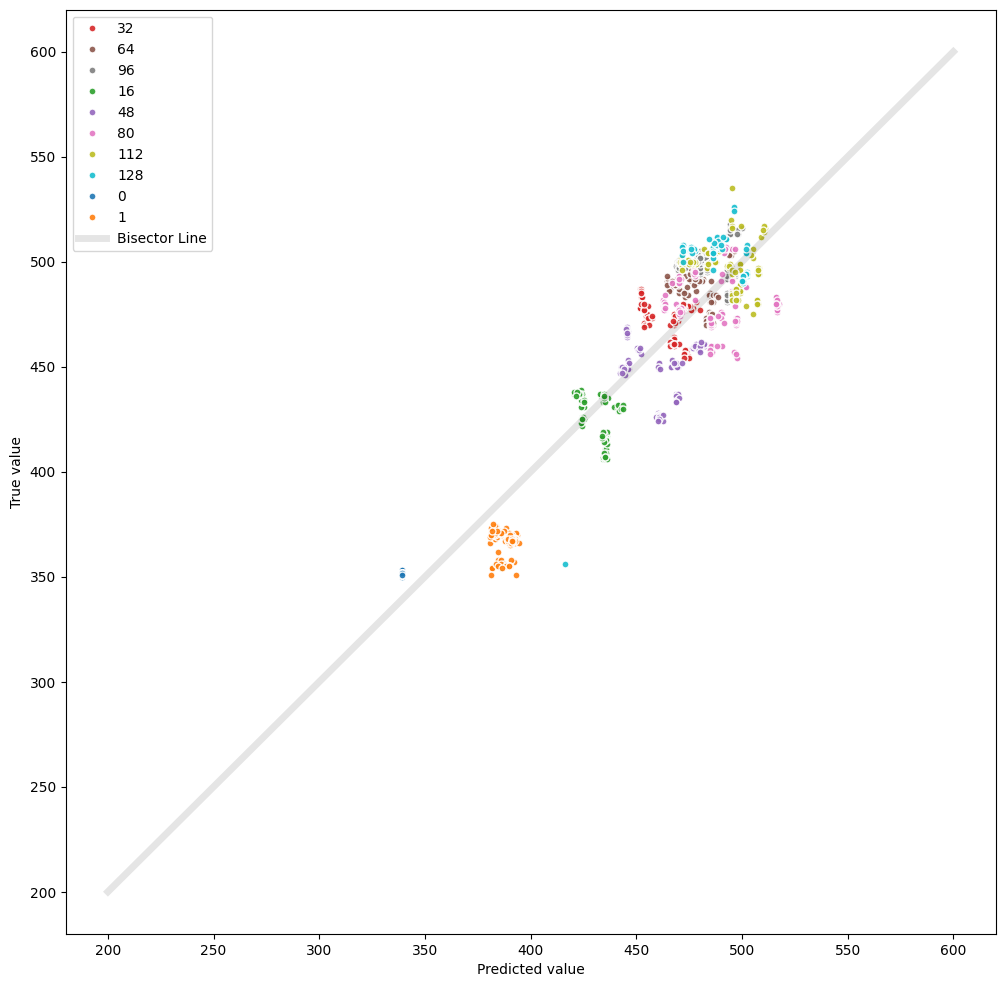

In [230]:
df_list_test= load_df_list_test()
plt.figure(figsize=(12,12))

for df in df_list_test:
#df = pd.concat(df_list_test)
    df["Total_power"]=df["PSUPower0"]+df["PSUPower1"]
    df=df[ (df["SystemCpuUsage"] < 7) | (df["Total_power"] > 400)]

    #df1=df[ (df["SystemCpuUsage"] < 40) | (df["Total_power"] > 425)].copy()
    df1 = normalize_model1(df.copy())
    prediction=list()
    if False:
        for row in df1[independent_variables].to_numpy():
            #print(row)
            prediction.append(row@coeff_1[:-1] + intercept_1)
        df1["prediction"]=prediction
        test_name=df1["name"].iloc[0]
        cores=df1["cores"].iloc[0]
        plt.plot(df1["prediction"],df1["Total_power"], 's', 
                 markersize=5, 
                 alpha=0.9,
                 fillstyle='full',
                 markeredgecolor='white',
                 markeredgewidth=1,label=cores,color=cores_to_color[cores])
    if True:
        df = df[df["SystemCpuUsage"] > 0]
        if len(df) <1:
            continue
        df2 = normalize_model3(df.copy())
        #print(len(df2["SystemCpuUsage"]),len(df["SystemCpuUsage"]))

        prediction=list()

        for row in df2[independent_variables].to_numpy():
            #print(row)
            #print(row.shape,coeff_transform.shape)
            prediction.append(np.exp(row@coeff_transform+intercept_transform))
        df2["prediction"]=prediction
        test_name=df2["name"].iloc[0]
        cores=df2["cores"].iloc[0]
        plt.plot(df2["prediction"],np.exp(df2["Total_power"]), 'o', 
                 markersize=5, 
                 alpha=0.9,
                 #fillstyle='full',
                 markeredgecolor='white',
                 markeredgewidth=1,label=cores,color=cores_to_color[cores])


plt.plot([200,600],[200,600], '-k', linewidth=5, alpha=0.1, label='Bisector Line')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.ylabel("True value")
plt.xlabel("Predicted value")

Text(0.5, 0, 'Socket power predicted')

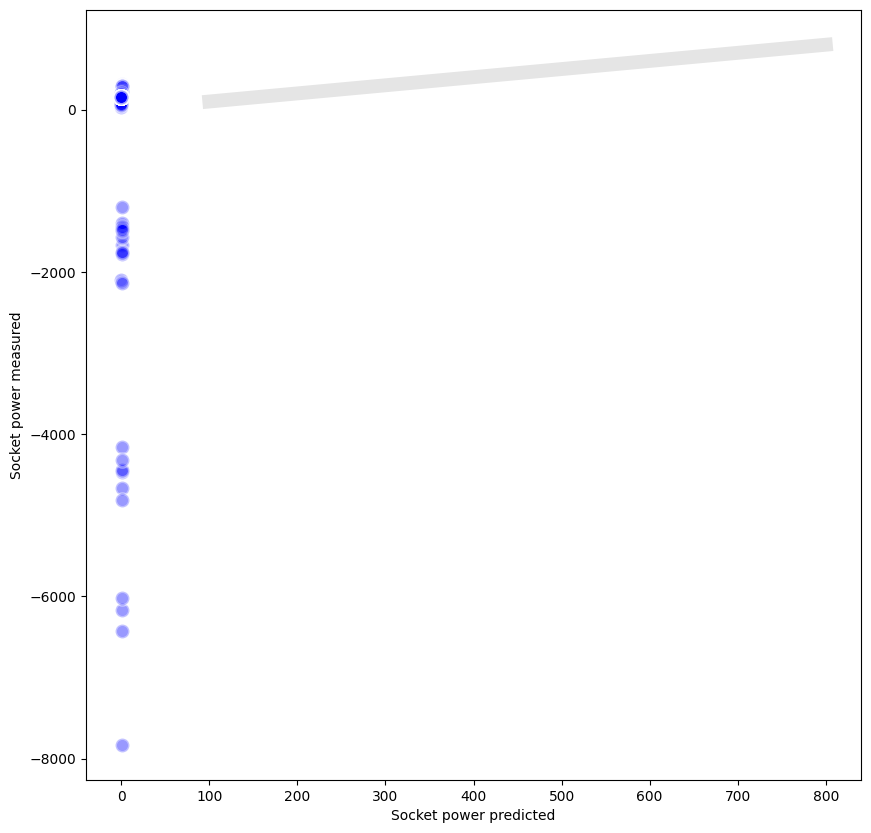

In [188]:
df_list_train= load_df_list_train()
df = pd.concat([ i  for i in df_list_train if i is not None])
prediction=list()

for row in df[independent_variables].to_numpy():
    prediction.append(row@coeff_1[:-1])

plt.figure(figsize=(10,10))
plt.plot(prediction,df["SocketPower0"]+df["SocketPower1"], 'bo', 
         markersize=10, 
         alpha=0.4,
         fillstyle='full',
         markeredgecolor='white',
         markeredgewidth=2)

plt.plot([100,800],[100,800], '-k', linewidth=10, alpha=0.1, label='Bisector Line')
#plt.xlim([100,800])
#plt.ylim([100,800])
plt.ylabel("Socket power measured")
plt.xlabel("Socket power predicted")

In [177]:
def plot(df,name,coeff):
    intercept=coeff_transform[-1]
    coeff=coeff_transform[:-1]
    
    # Your data
    column_name_probability = ['ProbabilityScalarArithmetic',
        'ProbabilityScalarLogic',
        'ProbabilityScalarMemory',
        'ProbabilityScalarBranch',
        'ProbabilityScalarJump',
        'ProbabilityVectorArithmetic',
        'ProbabilityVectorLogic',
        'ProbabilityVectorMemory',
        'ProbabilityVectorBranch',
        'ProbabilityVectorJump']
    
    column_name_probability_labels = ['ScalarArithmetic',
        'ScalarLogic',
        'ScalarMemory',
        'ScalarBranch',
        'ScalarJump',
        'VecArithmetic',
        'VecLogic',
        'VecMemory',
        'VecBranch',
        'VecJump']
    
    plt.figure(figsize=(14,14))

    plt.subplot(2, 2, 1)

    plt.title(name)
    x=range(0,len(column_name_probability))
    
    plt.bar(x=x,height=df[column_name_probability].mean(),alpha=0.3)
    plt.errorbar(x,df[column_name_probability].mean(),yerr=df[column_name_probability].std(), fmt='o')
    #.plot(kind='bar', width=0.8) # Plot bar chart
    #plt.title("ksad") # Set title as column name
    #plt.xlabel(column) # Set x-axis label as column name
    plt.xticks(ticks=x,labels=column_name_probability_labels,rotation=90-15,fontsize=8)
    #plt.xticks(ticks=range(0,len(column_name)),labels=column,rotation=45)
    plt.ylabel('Value') # Set y-axis label as 'Value'
    column_name=["SocketPower0", "SocketPower1","PSUPower0","PSUPower1"]
 #   df = df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ]

    plt.subplot(2, 2, 2)
    plt.title("System power")
    _ = plt.plot(df[ (df["SocketPower0"] > 0) & (df["SocketPower1"] > 0) ][column_name],label=column_name)
    df=normalize_model2(df.copy())
   
#    x=(df[column_name_probability+["SocketPower0","SocketPower1"]].to_numpy()@coeff)+intercept
    x=(df[column_name_probability].to_numpy()@coeff)+intercept

    _ = plt.plot(x,label="Predicted")
    
    plt.ylim([0,900])
    plt.legend()
    plt.subplot(2, 2, 3)
    filtered_df = df[column_name_probability].loc[:, df[column_name_probability].mean() > 0]
    plt.plot(filtered_df,label=filtered_df.columns.tolist())
    plt.legend()
    plt.subplot(2, 2, 4)
    plt.title("System usage")
    plt.plot(df[["SystemCpuUsage" ,"ProcessCpuUsage"]],label=["SystemCpuUsage" ,"ProcessCpuUsage"])
    plt.legend()
    plt.savefig(f"{name}.png")

Opened file: power_copy.csv
Opened file: power_copy_mem.csv
Opened file: power_copy_mem_avx.csv
Opened file: power_daxpy_mem_avx_fma.csv
Opened file: power_stream_mem_avx_fma.csv
Opened file: power_update_avx.csv
Opened file: power_load_mem.csv
Opened file: power_load_avx.csv
Opened file: power_store_mem.csv
Opened file: power_store_mem_avx.csv
Opened file: power_peakflops_avx_fma.csv


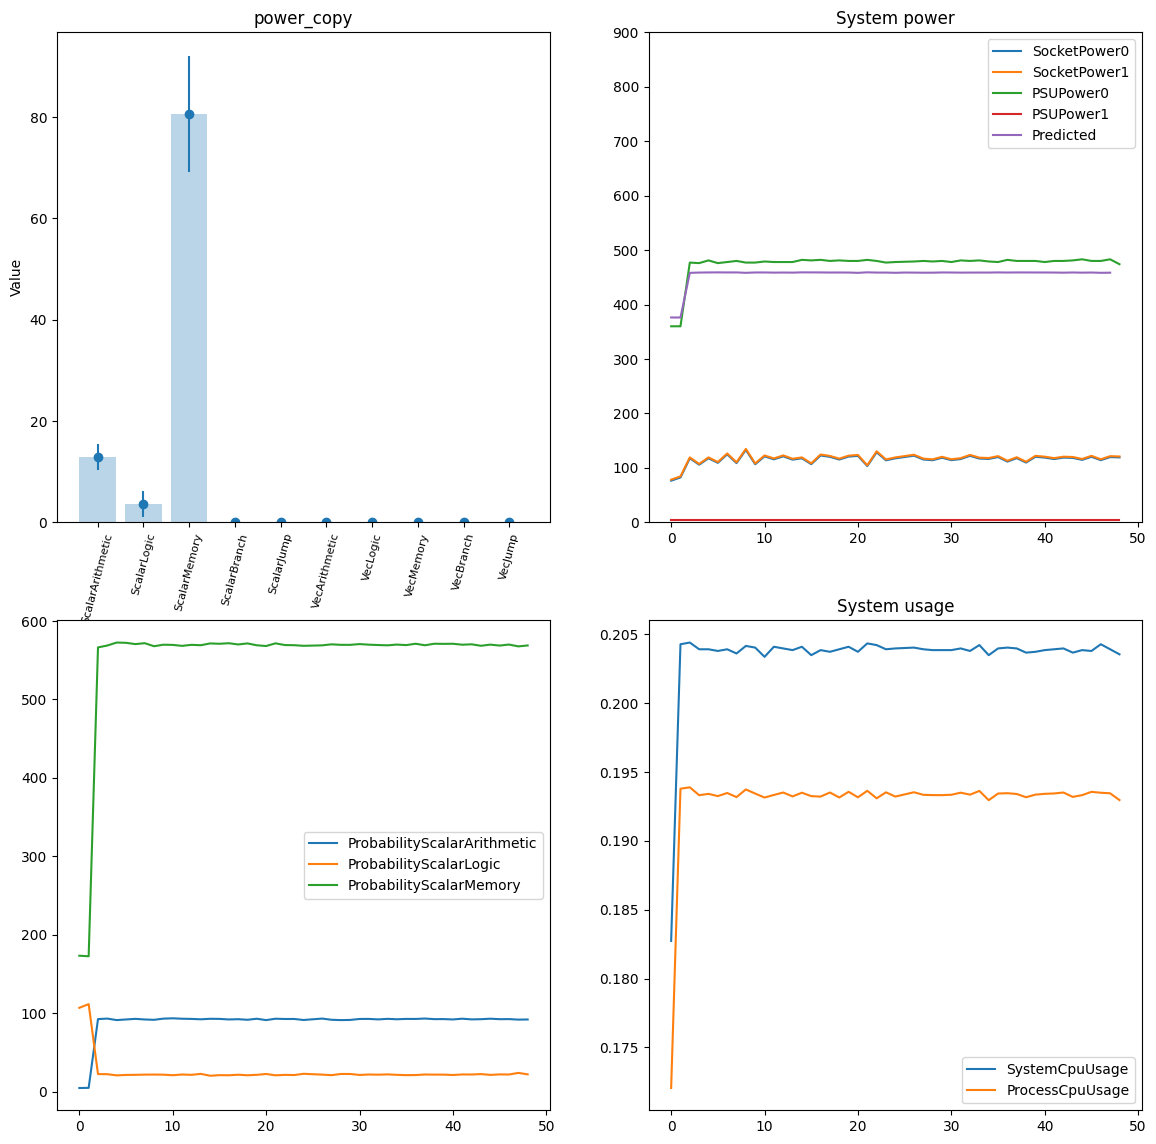

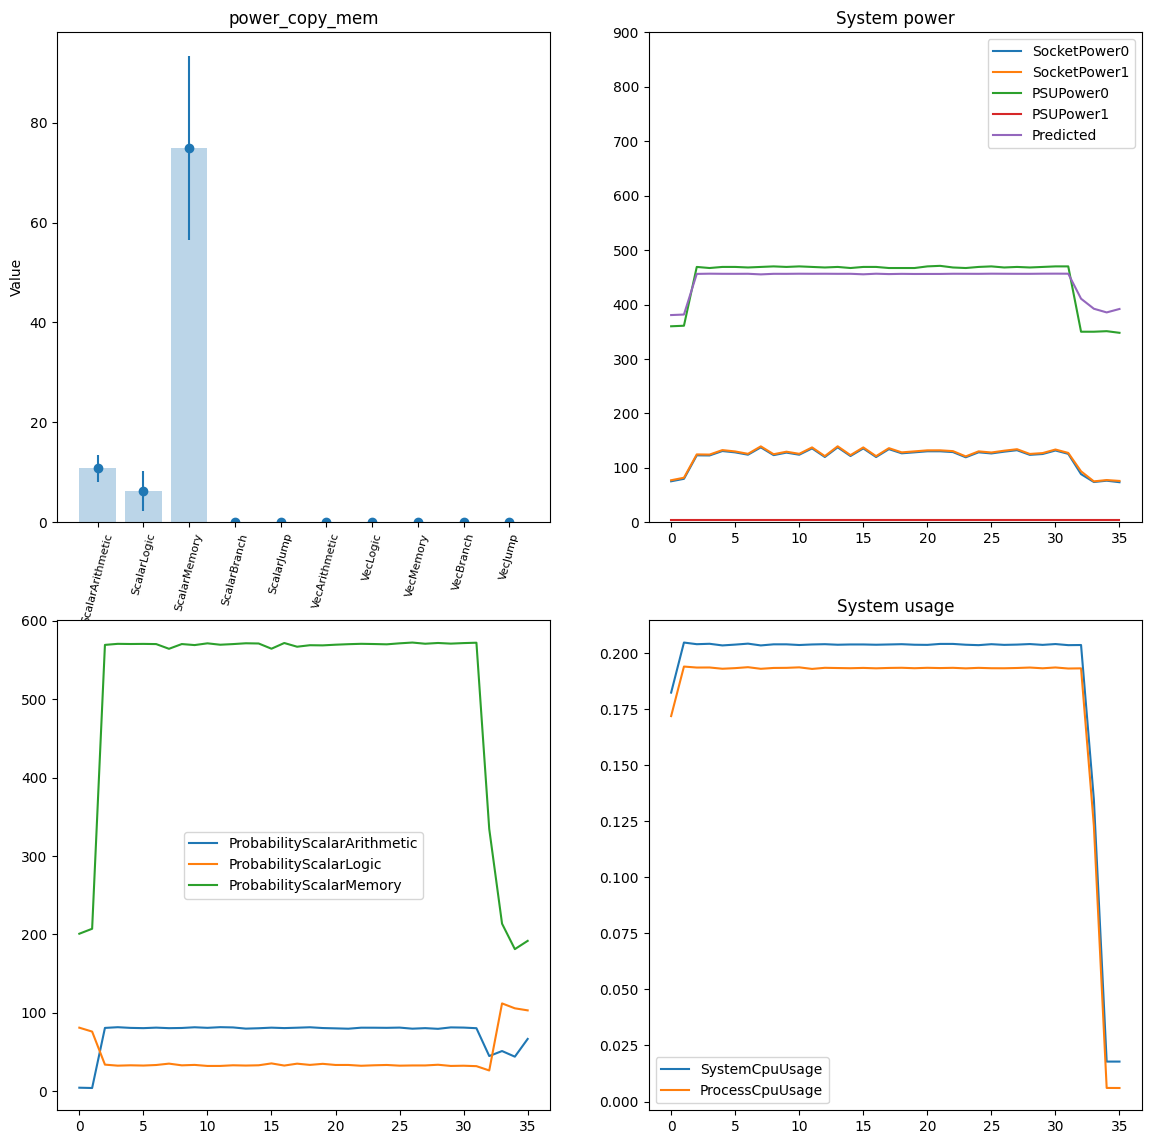

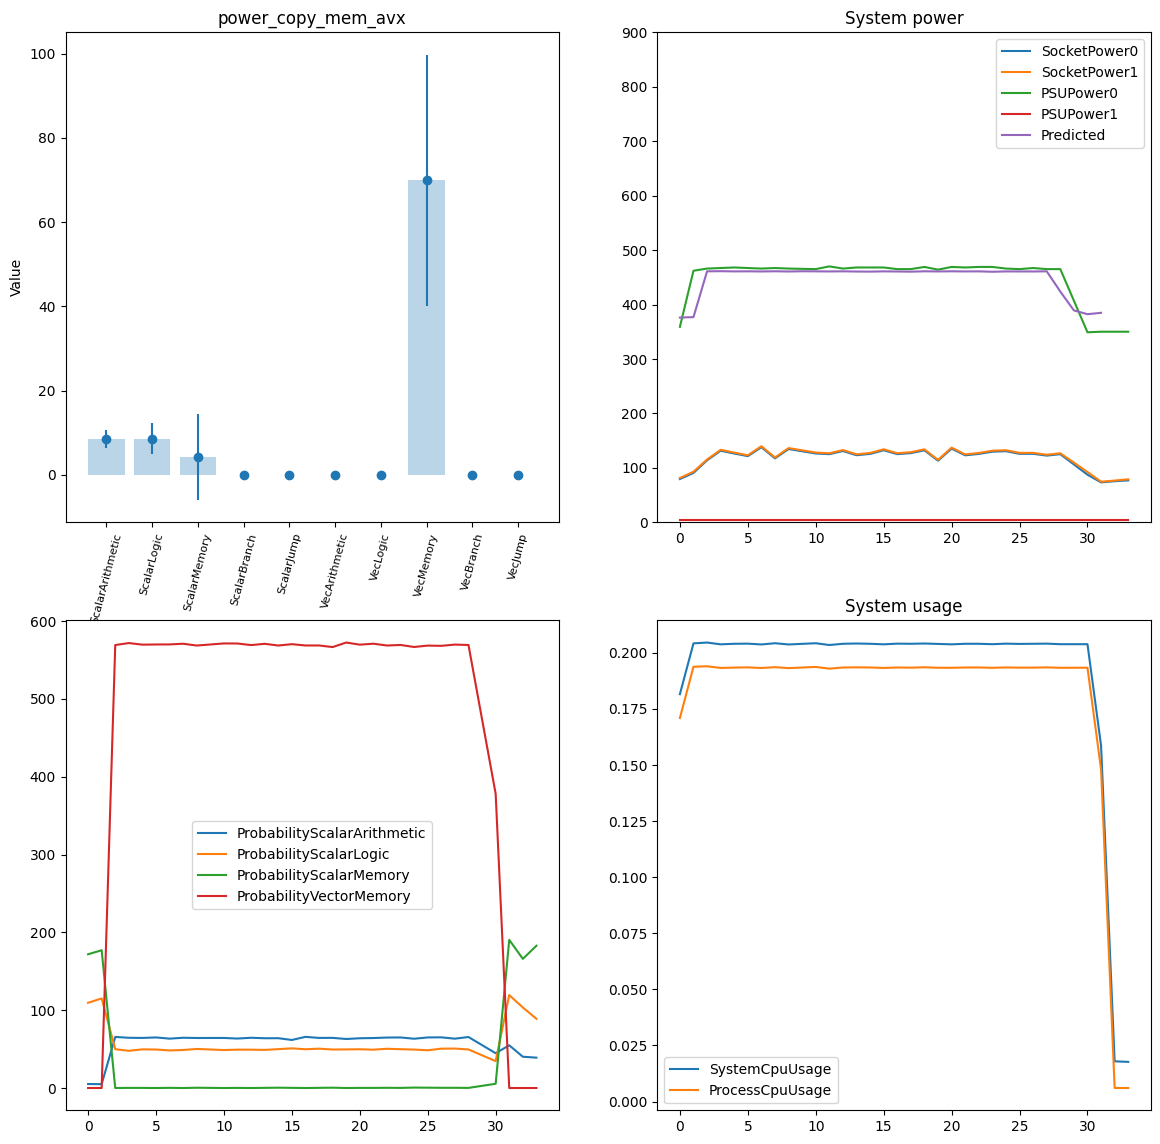

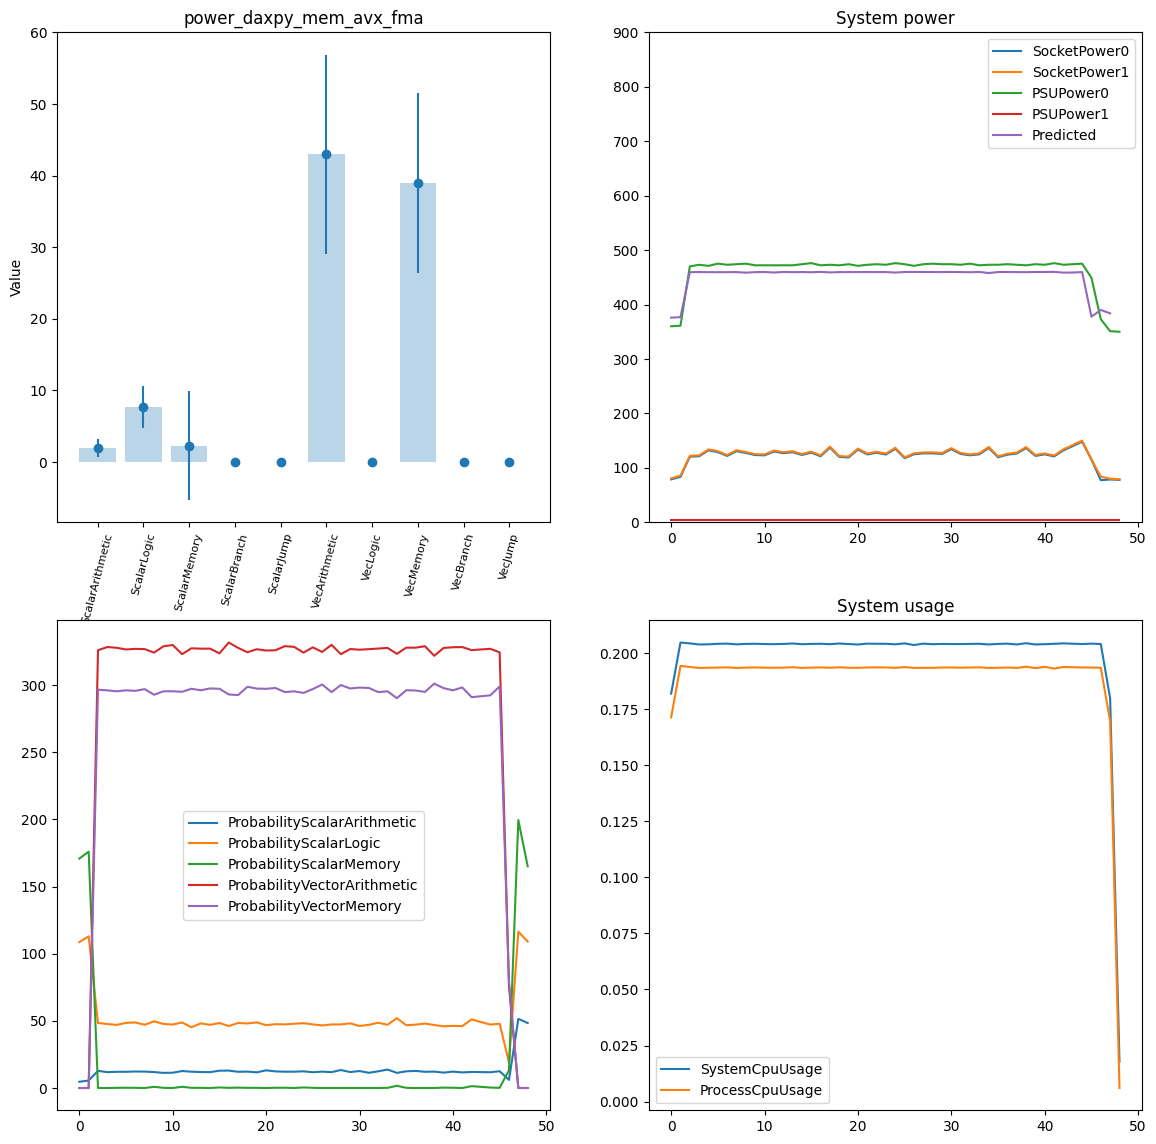

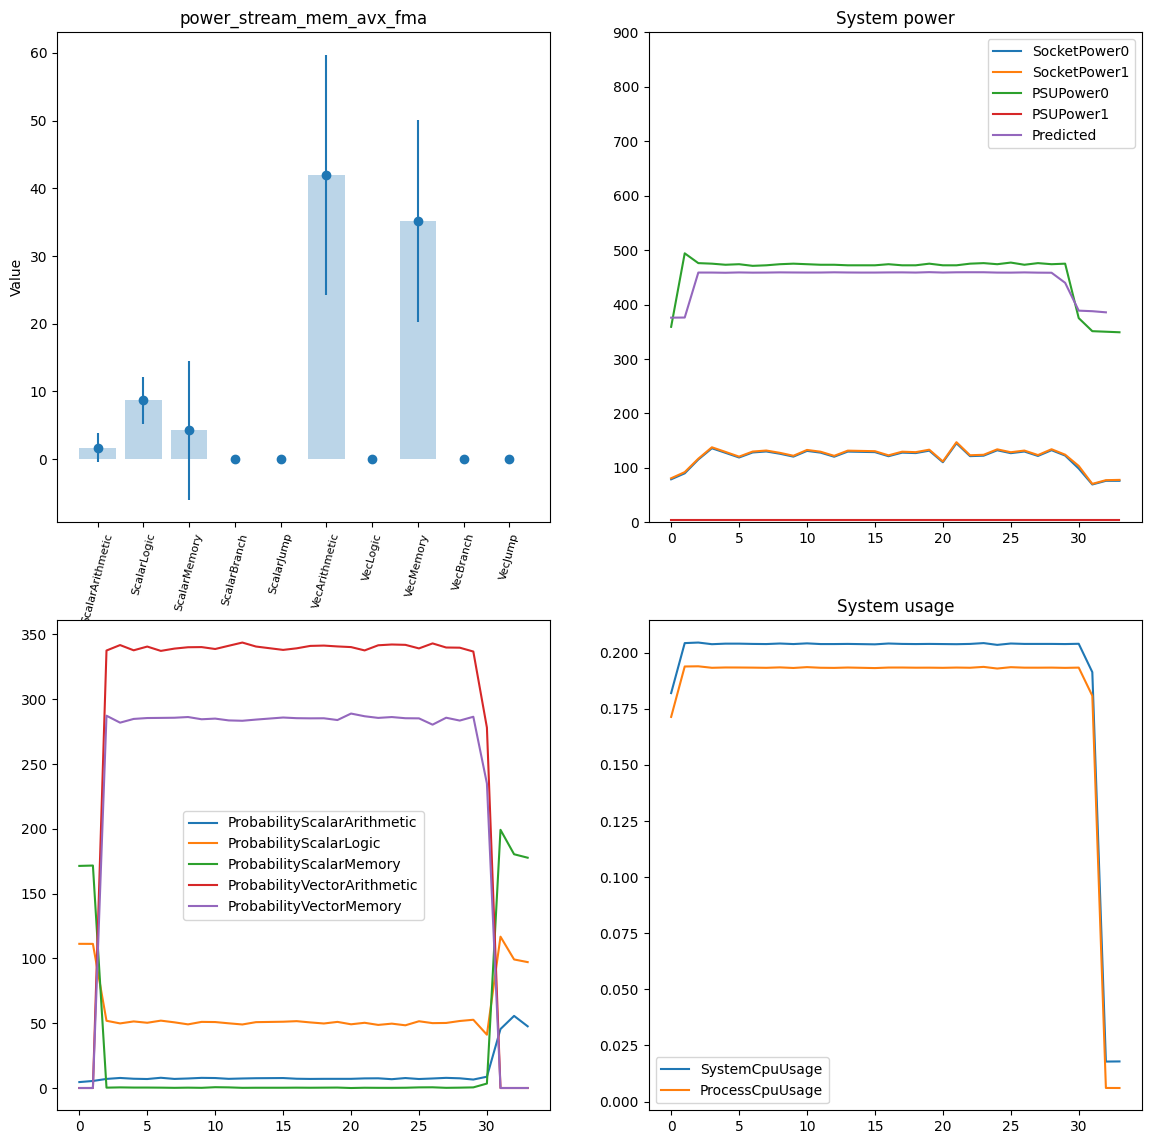

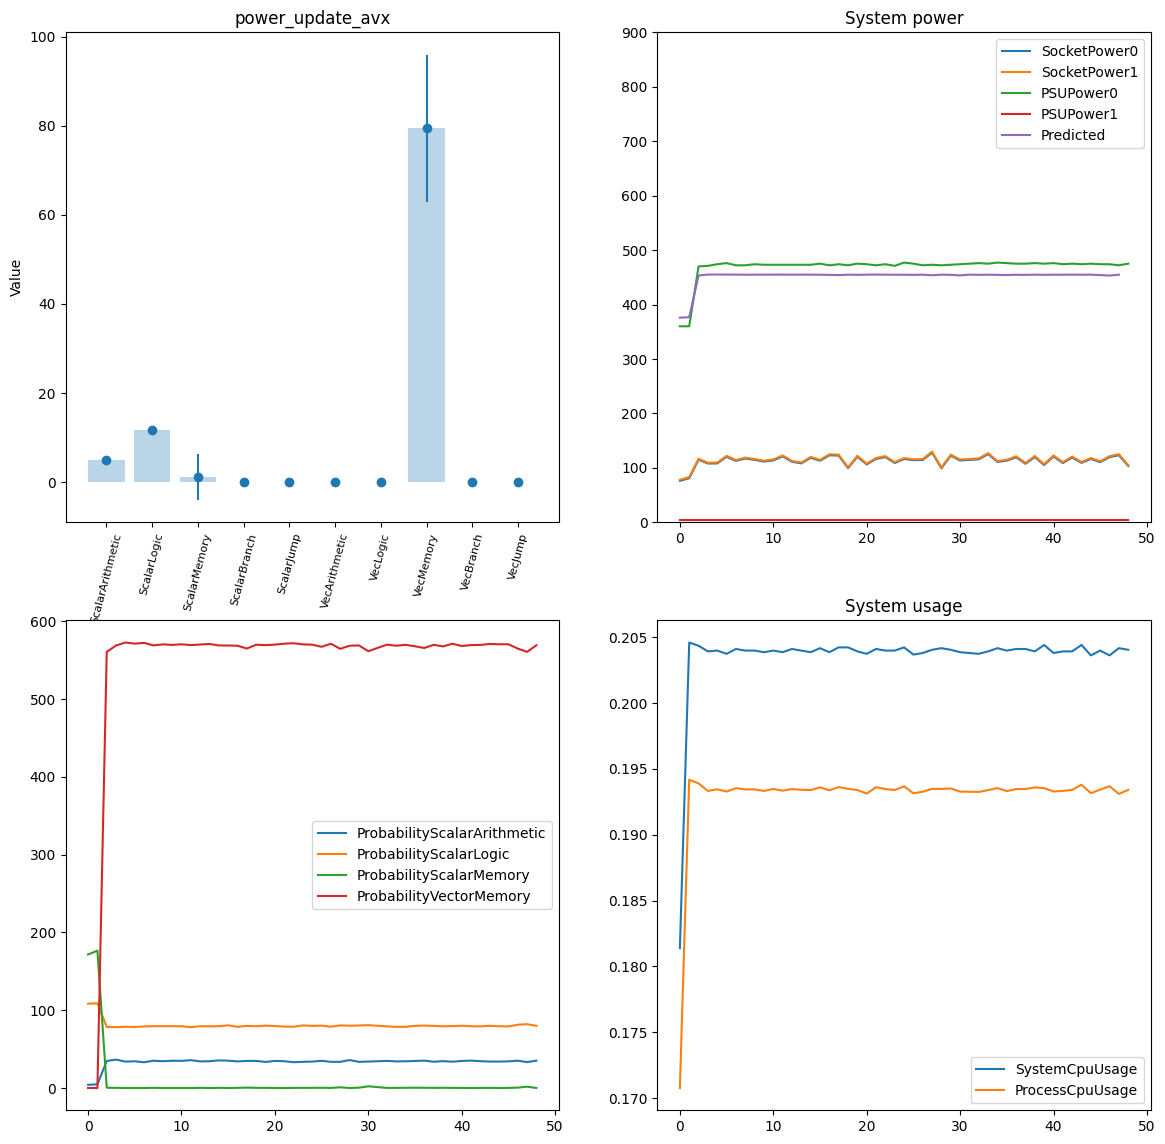

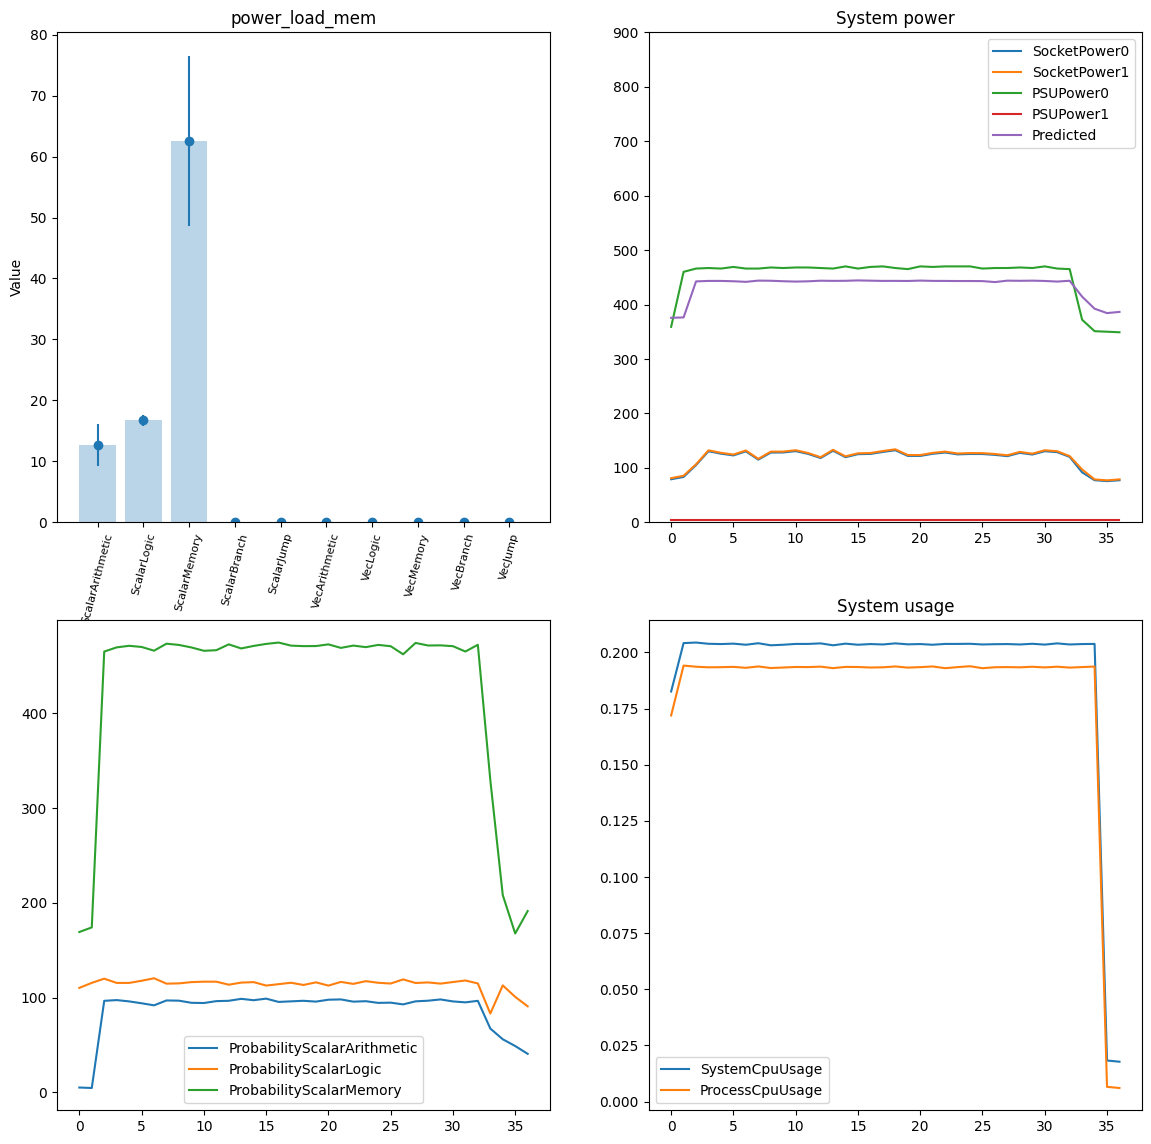

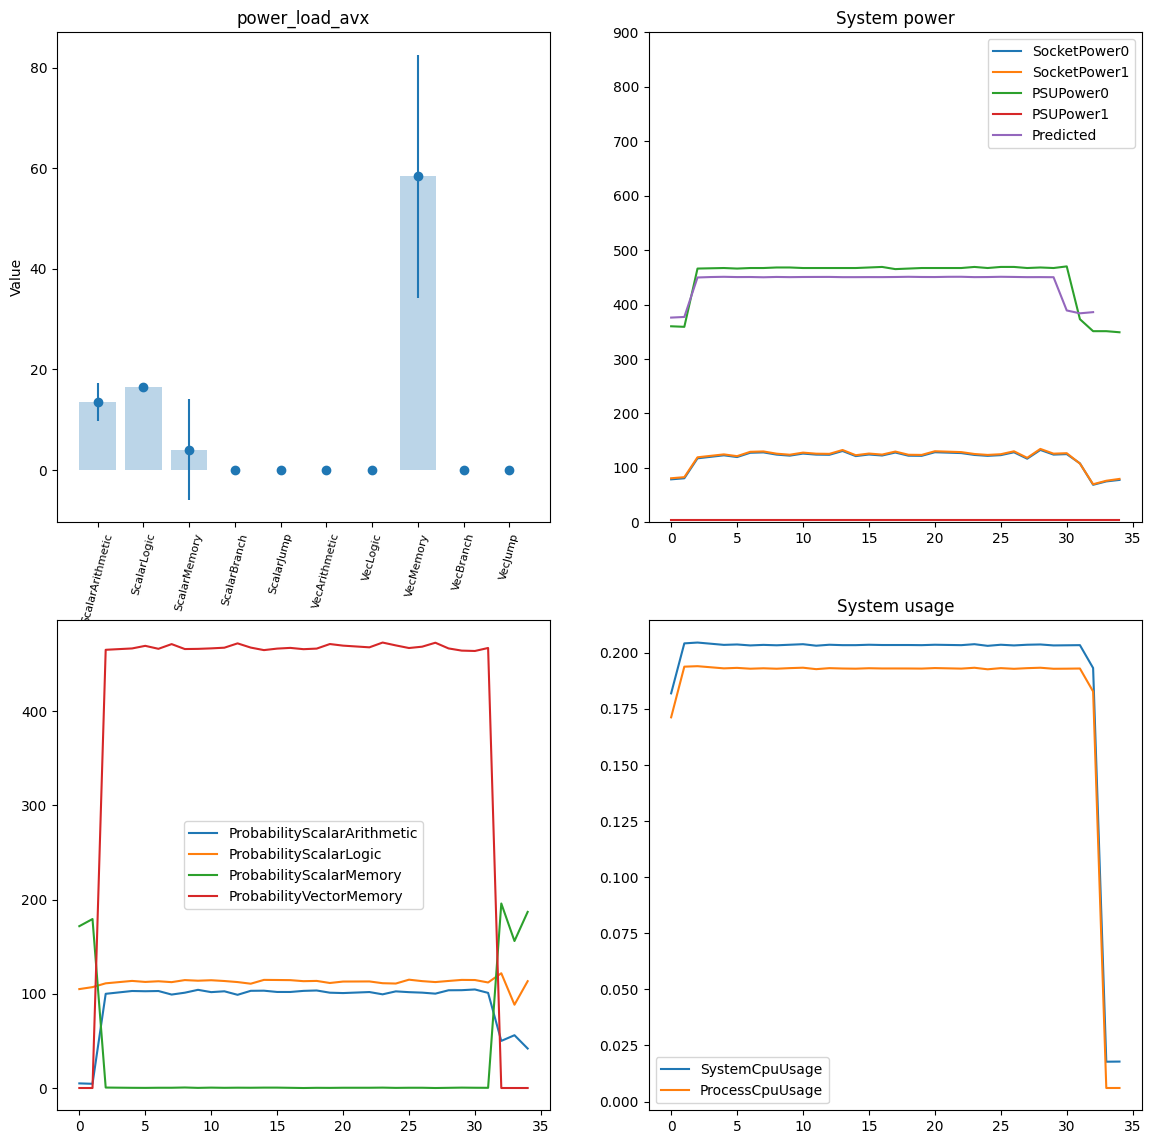

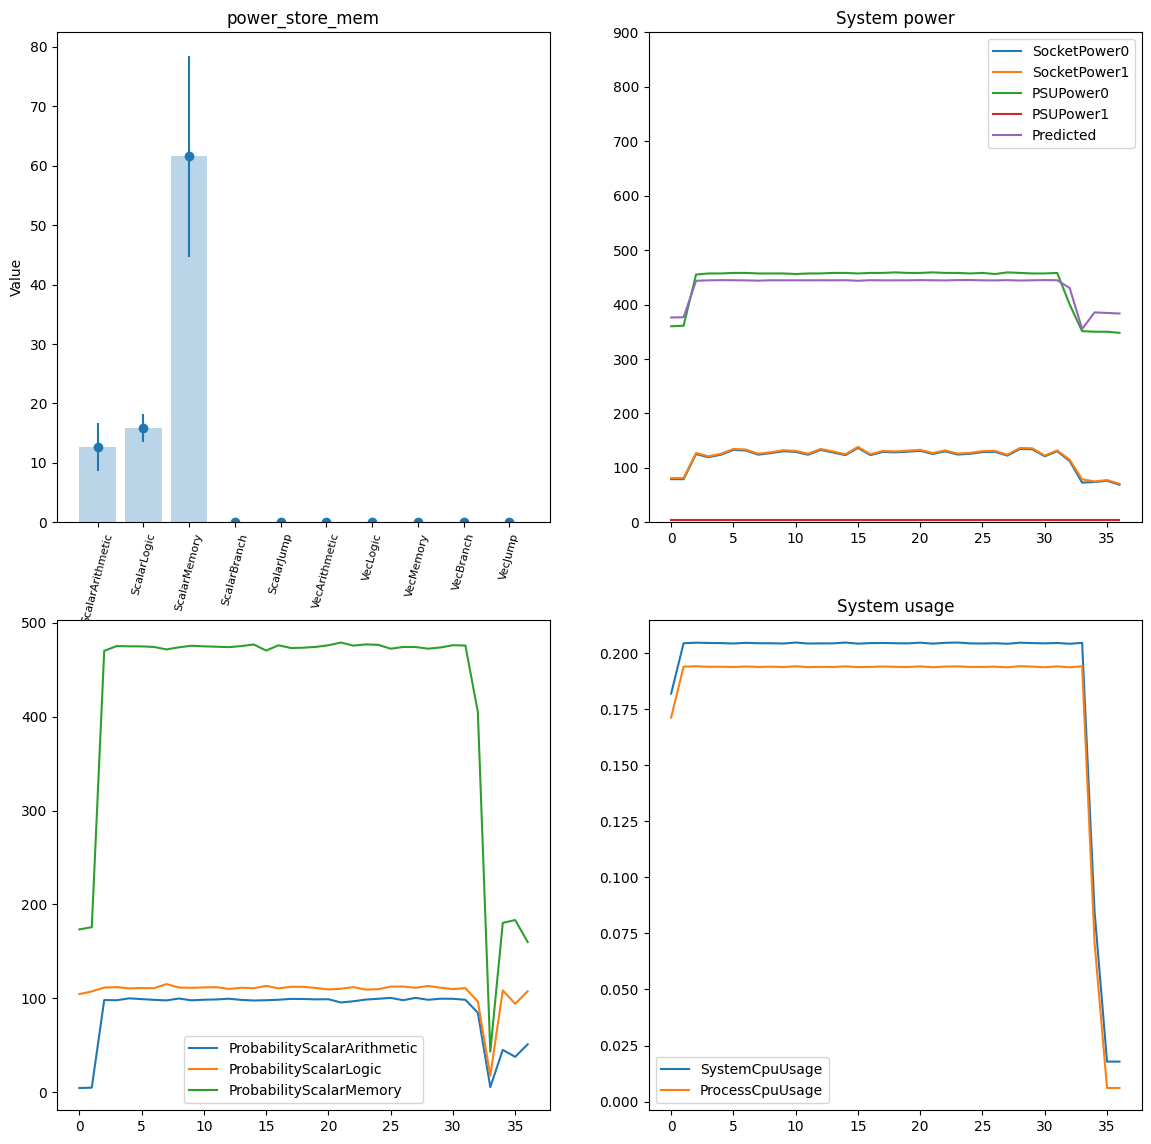

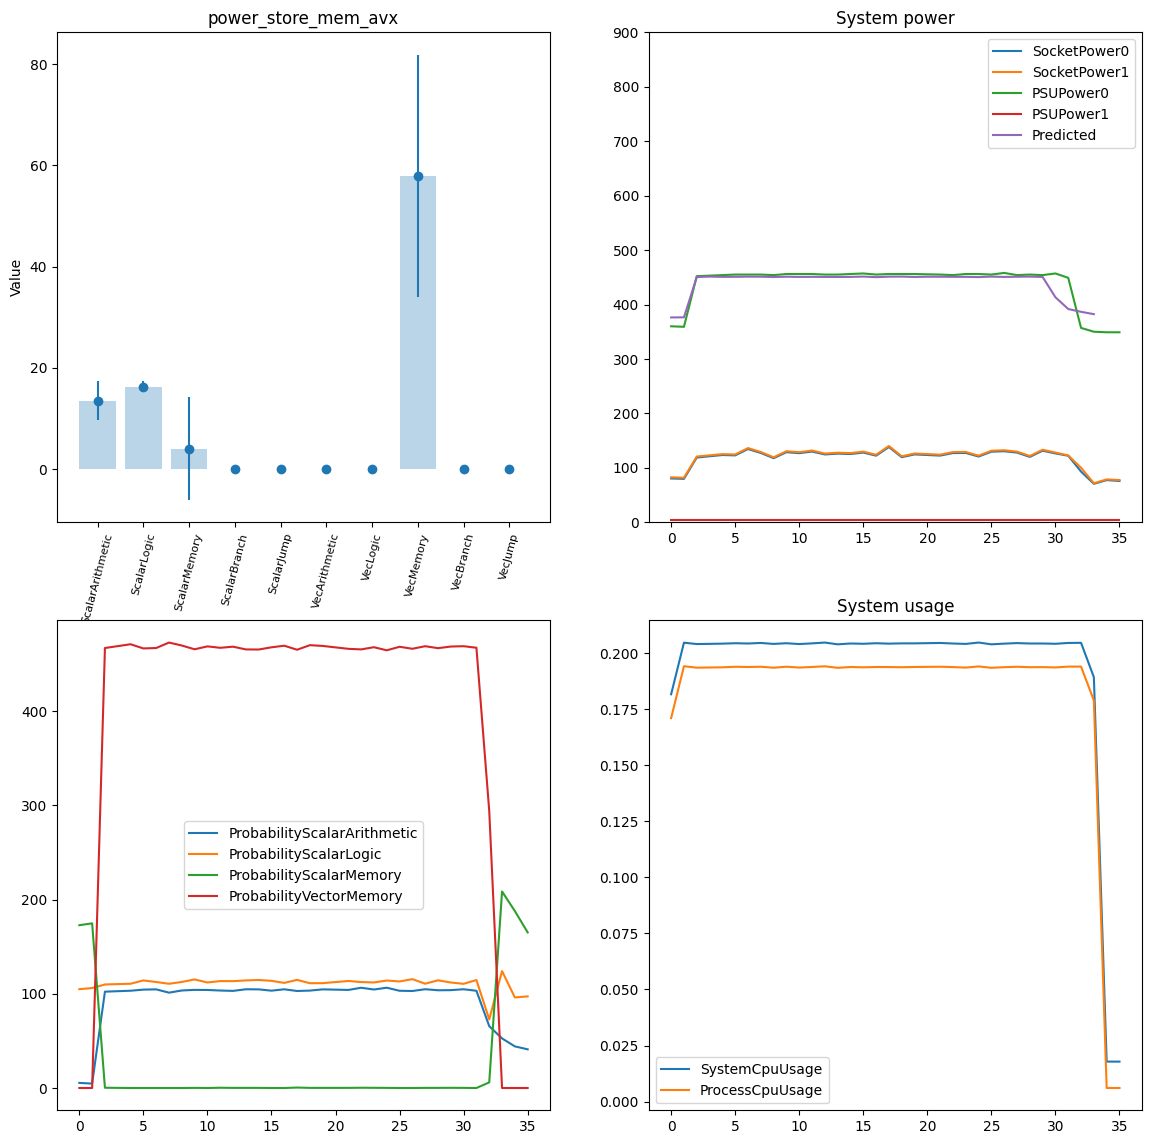

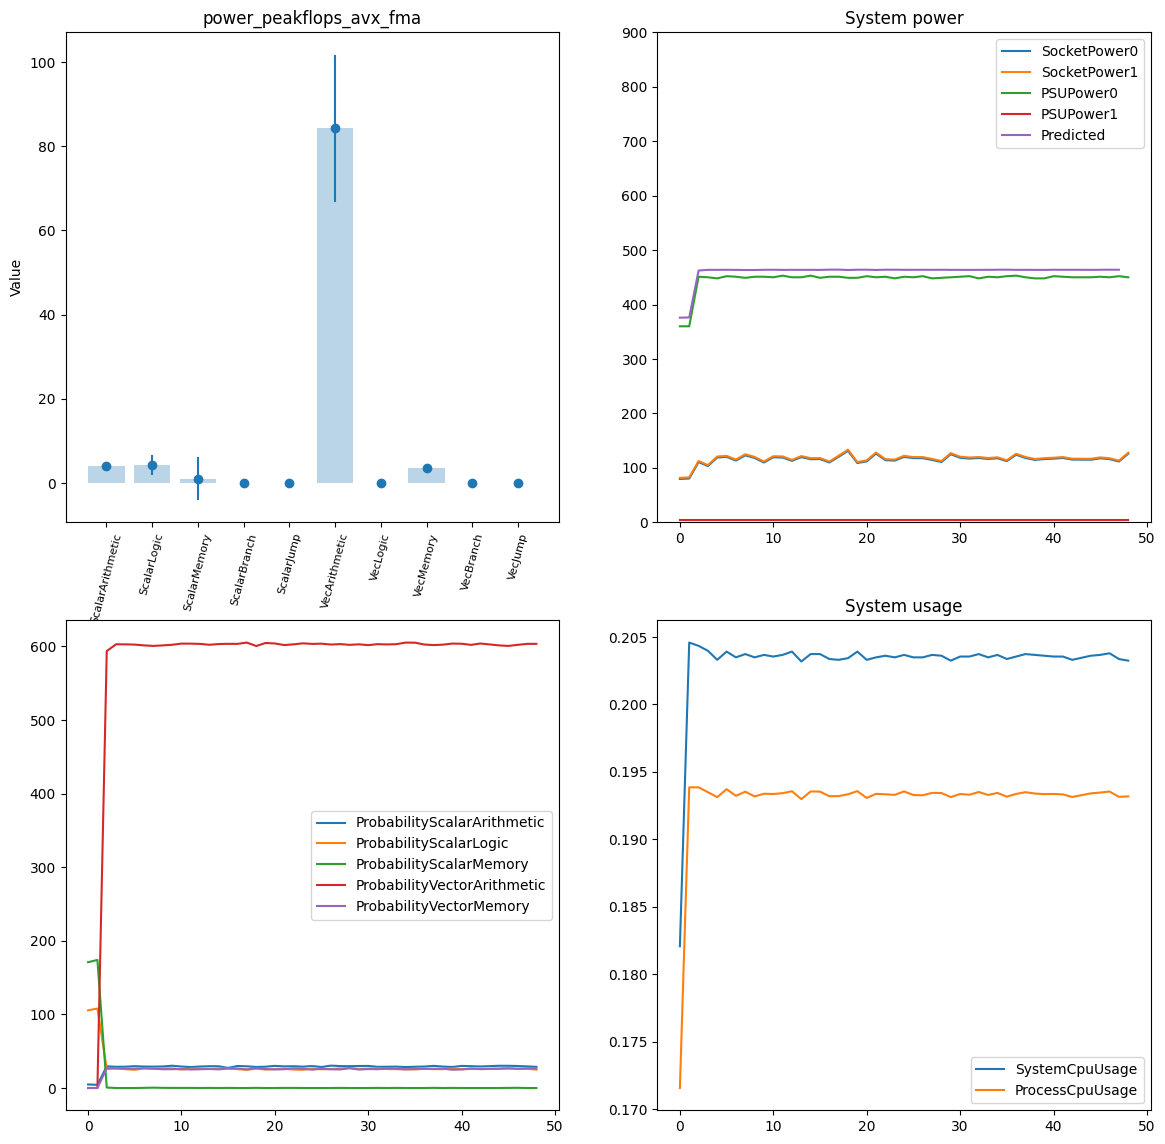

In [105]:
directory_list=["results_1500/results_32"]

df_list=list()
for directory in directory_list:
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            try:
                df = pd.read_csv(os.path.join(directory, filename))
                df_list.append(df)
                print(f"Opened file: {filename}")
                #print(df.head())  # prints the first 5 rows of each CSV file
                plot(df,os.path.basename(filename).split(".")[0],coeff_transform)
            except Exception as e:
                print(e)


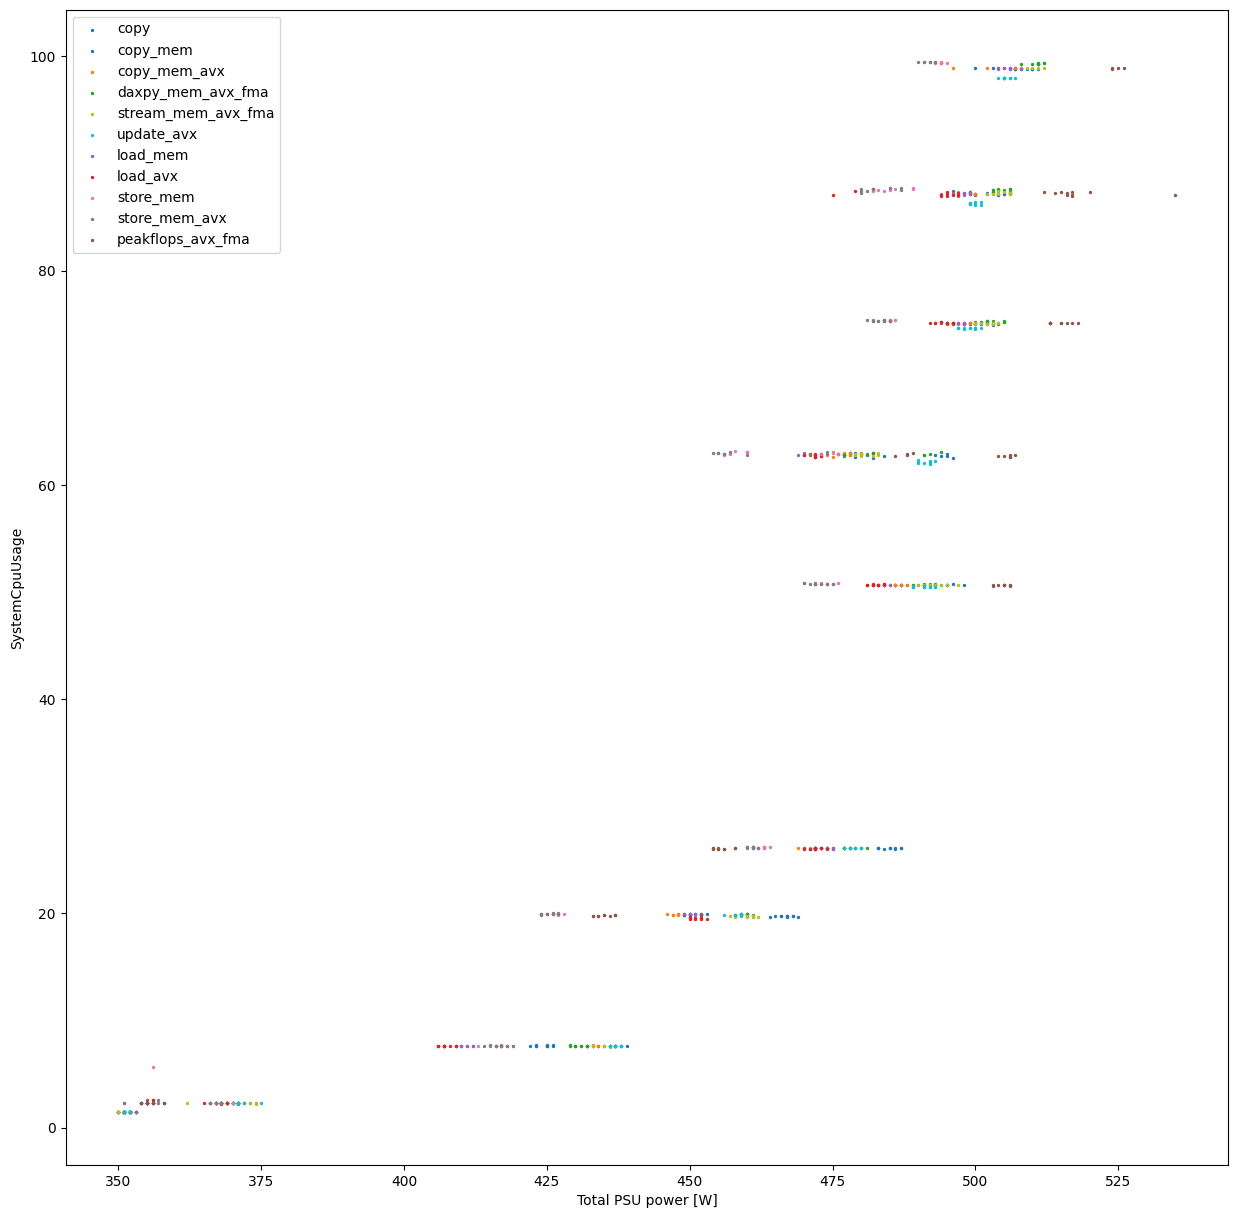

In [207]:
df_list_test= load_df_list_test()
df=pd.concat(df_list_test)
df["total_power"]=df["PSUPower0"]+df["PSUPower1"]
df=df[ (df["SystemCpuUsage"] < 7) | (df["total_power"] > 400)]
column_name_probability = ['ProbabilityScalarArithmetic',
        'ProbabilityScalarLogic',
        'ProbabilityScalarMemory',
        'ProbabilityScalarBranch',
        'ProbabilityScalarJump',
        'ProbabilityVectorArithmetic',
        'ProbabilityVectorLogic',
        'ProbabilityVectorMemory',
        'ProbabilityVectorBranch',
        'ProbabilityVectorJump']
plt.figure(figsize=(15,15))
color=[name_to_color[i] for i in df["name"]]

for _,row in df.iterrows():
    plt.scatter(row["total_power"],row["SystemCpuUsage"],s=2,label=row["name"], color=name_to_color[row["name"]])
    
plt.xlabel("Total PSU power [W]")
plt.ylabel("SystemCpuUsage")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


In [ ]:
for row in df:
    print(row)